# EasyVisa Project

## Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year.

The increasing number of applicants every year calls for a machine learning based solution that can help shortlist the candidates with a higher chance of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. As a data scientist, you have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* `case_id`: ID of each visa application
* `continent`: Information of continent the employee
* `education_of_employee`: Information of education of the employee
* `has_job_experience`: Does the employee has any job experience? Y= Yes; N = No
* `requires_job_training`: Does the employee require any job training? Y = Yes; N = No
* `no_of_employees`: Number of employees in the employer's company
* `yr_of_estab`: Year in which the employer's company was established
* `region_of_employment`: Information of foreign worker's intended region of employment in the US.
* `prevailing_wage`:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* `unit_of_wage`: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* `full_time_position`: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* `case_status`:  Flag indicating if the Visa was certified or denied

## Importing Necessary Libraries and Data

In [1]:
# Import libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Import libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import function to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Import libraries to calculate metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix
)

# Import libraries for model building
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    StackingClassifier
)
from sklearn.model_selection import GridSearchCV

import datetime

# Set precision for floats
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Allow access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read data into dataframe
df = pd.read_csv('/content/drive/MyDrive/DSBA/Ensemble-Techniques'
                 '/Project/EasyVisa.csv')

# Make a copy of data to avoid overwriting original
visas_df = df.copy()

Mounted at /content/drive


## Data Overview

#### Examine the dataset

In [3]:
# View sample rows of data
visas_df.sample(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
10305,EZYV10306,Oceania,Master's,Y,Y,2118,1966,West,44212.340,Year,Y,Denied
13769,EZYV13770,South America,Bachelor's,Y,N,3517,1997,West,43486.290,Year,Y,Certified
19748,EZYV19749,Asia,High School,N,N,3569,2013,Midwest,130753.830,Year,N,Denied
7099,EZYV7100,Asia,Doctorate,Y,N,1783,1991,Northeast,112592.550,Year,Y,Certified
6858,EZYV6859,Asia,Bachelor's,N,N,1112,1804,West,135319.480,Year,Y,Denied
16278,EZYV16279,Asia,Master's,Y,N,37,1968,South,42289.480,Year,Y,Certified
10011,EZYV10012,Asia,Bachelor's,N,N,163,2010,Northeast,14130.760,Year,Y,Certified
11954,EZYV11955,North America,Master's,N,N,5345,1998,Northeast,79419.000,Year,Y,Certified
9328,EZYV9329,Asia,Master's,Y,N,3338,2003,Northeast,107608.280,Year,Y,Certified
16097,EZYV16098,Asia,Bachelor's,Y,N,3541,1994,Island,169221.650,Year,Y,Certified


#### Understand the shape of the dataset and data types contained

In [4]:
# Use shape method to view the dataframe dimensions
visas_df.shape

(25480, 12)

In [5]:
# Use info() to print a concise summary of the dataframe
visas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations:**
* The dataset has 25,480 rows and 112 columns
* There are 2 64-bit integer columns, 1 64-bit float column, and 9 object type columns
* The `case_id` column likely contains all unique values and thus will not improve the model
* The `has_job_experience`, `requires_job_training`, and `full_time_position` columns are binary variables
* The target variable is the `case_status` which is an object type
* It may be beneficial to convert `yr_of_estab` to 'years since establishment'

#### View statistical summary of the data

In [6]:
# Use describe() to print a concise statistical summary of all the data
visas_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.000,NaN,NaN,NaN,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,NaN,NaN,NaN,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.000,NaN,NaN,NaN,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:

* **Case ID:** There are 25,480 cases in the dataset, each uniquely identified. Given that these identifiers are exclusive to each case, they do not offer any predictive value and will not useful in the model.
* **Case Status:** Out of 25,480 visa applications, 8,462 were not approved, indicating a potential imbalance in the dataset that might need consideration in the prediction model.

* **Applicant Profile:**
 * The top continent represented is Asia, with 16,861 applicants.
 * Most applicants (14,802 cases) have job experience, and a substantial majority (22,525 cases) do not require job training. This suggests that most applicants are equipped with the necessary skills to immediately transition to the role.
 * A Bachelor's degree is the most common among applicants (10,234 cases).

* **Employer Profile:**
 * The number of employees in the applicants' companies varies widely, averaging 5,667. The negative minimum value (-26) might be due to a data entry error and requires further investigation.
 * The companies were established between 1800 and 2016, with an average establishment year of 1979, indicating that most applicants are from well-established firms.

* **Job Profile:**
 * The average prevailing wage is \$74,455.82, with a range from \$2.14 to \$319,210.27, indicating diverse roles and industries among the applicants. This wide range is also a result of the varying wage units.
 * Most wages are calculated on a yearly basis (22,962 cases), aligning with standard full-time employment contracts. A majority of positions are full-time roles (22,773 cases).
 * The Northeast region has the highest number of applications (7,195 cases).

#### Check for duplicate entries in the data

In [7]:
visas_df.duplicated().sum()

0

Observations:
* There are no duplicate entries in the dataset.

#### Check for missing values in the data

In [8]:
# Check for missing values
visas_df.isnull().values.any()

False

Observations:
* There are no null or missing entries in the dataset.

#### Perform preliminary data processing

In [9]:
# Remove case ID column as it is not useful to the model
visas_df.drop(['case_id'], axis=1, inplace=True)

In [10]:
# Convert object data types into category data type
cols = visas_df.select_dtypes(['object'])
for col in cols.columns:
    visas_df[col] = visas_df[col].astype('category')

In [11]:
visas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


Observations:
* Only around 800 kB is now needed to store the dataframe, which is a signifcant reduction from the the original 2.3 MB.

## Exploratory Data Analysis (EDA)


### Utility Functions

In [12]:
def plot_histogram_boxplot(data, feature, x_label, title=None, figsize=(20, 5),
                           show_plots={'histogram': True, 'boxplot': True},
                           boxplot_palette='Paired', boxplot_y_feature=None,
                           boxplot_y_label=None, boxplot_order=None,
                           histplot_kde=True, histplot_bins=None,
                           histplot_hue=None, histplot_palette='Paired'):
    """
    Create a combined histogram and boxplot for a given feature in a dataframe.

    Args:
        data (DataFrame): The dataframe containing the data
        feature (str): The feature to plot
        x_label (str): The label for the x-axis for both plots
        title (str): Plot title (None will default to 'Distribution of `feature`)
        figsize (tuple): The size of the figure (width, height)
        show_plots (dict): A dictionary specifying which plots to display
            Defaults to showing both histogram and boxplot
        boxplot_palette (str): Palette of the boxplot (default is 'Paired')
        boxplot_y_feature (str): The y-axis feature for the boxplot (default is None)
        boxplot_y_label (str): The label for the y-axis of the boxplot (default is None)
        boxplot_order (list): Order of boxplots, uses default if None
        histplot_kde (bool): Whether to plot a KDE on the histogram (default is True)
        histplot_bins (int): The number of bins for the histogram (default is None)
        histplot_hue (str): Add hue to histogram (default is None)
        histplot_palette (str): Palette of the histplot (default is 'Paired')

    Returns:
        None
    """
    if not any(show_plots.values()):
        return

    # Set default title if none provided
    if not title:
      title = f'Distribution of {feature}'

    # Define styles
    label_fontdict = {'weight': 'bold', 'size': 12}
    subplot_fontdict = {'weight': 'bold', 'size': 15}
    meanprops_dict = {'marker': '+', 'markeredgecolor': 'white',
                      'markersize': '10'}
    xtick_angle = 45

    # Determine which plots to display
    plots_to_show = [key for key, val in show_plots.items() if val]

    # Create subplots for selected plots
    fig, axes = plt.subplots(
        ncols=len(plots_to_show),
        sharex=True,
        figsize=figsize
    )

    # Plot histogram (if applicable)
    if show_plots.get('histogram'):
        ax_hist = axes[0] if len(plots_to_show) > 1 else axes

        # Create the histogram
        if histplot_bins:
            sns.histplot(data=data, x=feature, hue=histplot_hue,
                         kde=histplot_kde, ax=ax_hist, bins=histplot_bins,
                         linewidth=2)
        else:
            sns.histplot(data=data, x=feature, hue=histplot_hue,
                         kde=histplot_kde, ax=ax_hist, linewidth=2)

        # Add mean and median lines if hue not applied (for clarity)
        if not histplot_hue:
            ax_hist.axvline(data[feature].mean(), color='black',
                            linestyle='--', label='Mean')
            ax_hist.axvline(data[feature].median(), color='black',
                            linestyle='-', label='Median')

            # Set custom legend showing mean and median
            ax_hist.legend(loc='upper right')

        # Customize the x-axis labels for better readability
        ax_hist.tick_params(axis='x', labelrotation=xtick_angle)

        # Set labels for histplot
        ax_hist.set_title(title, fontdict=subplot_fontdict)
        ax_hist.set_xlabel(x_label, fontdict=label_fontdict)
        ax_hist.set_ylabel('Frequency', fontdict=label_fontdict)

    # Plot boxplot (if applicable)
    if show_plots.get('boxplot'):
        ax_box = axes[1] if len(plots_to_show) > 1 else axes

        # Create the boxplot
        sns.boxplot(data=data, x=feature, y=boxplot_y_feature,
                    ax=ax_box, showmeans=True, meanprops=meanprops_dict,
                    order=boxplot_order, palette=boxplot_palette, linewidth=2)

        # Add legend for mean
        ax_box.legend(handles=[plt.Line2D([0], [0], marker='+', color='black',
                                          label='Mean', markersize=10,
                                          linestyle='None')], loc='upper right')

        # Customize the x-axis labels for better readability
        ax_box.tick_params(axis='x', labelrotation=xtick_angle)

        # Set labels for boxplot
        ax_box.set_title(title, fontdict=subplot_fontdict)
        ax_box.set_xlabel(x_label, fontdict=label_fontdict)
        ax_box.set_ylabel(boxplot_y_label, fontdict=label_fontdict)

    plt.tight_layout()
    plt.show()

In [13]:
def plot_barplot(data, feature, x_label, y_label='Count',
                 display_percentage=True, top_n=None, palette='Paired'):
    """
    Create a barplot with optional percentage display.

    Args:
        data (DataFrame): The dataframe containing the data
        feature (str): The name of the column in the dataframe
        x_label (str): Label for the x-axis of both plots
        y_label (str): Label for the y-axis of both plots
        display_percentage (bool): If True, display percentages instead of counts (default is False)
        top_n (int): Display the top n category levels (default is None, i.e., display all levels)
        palette (str): Palette of the boxplot (default is 'Paired')

    Returns:
        None
    """
    # Define styles
    label_fontdict = {'weight': 'bold', 'size': 12}
    subplot_fontdict = {'weight': 'bold', 'size': 15}
    xtick_angle = 45

    # Calculate the total number of data points
    total_data_points = len(data[feature])

    # Calculate the number of unique categories in the specified column
    unique_categories_count = data[feature].nunique()

    # Set the figure size based on the number of unique categories or top_n
    figsize = (unique_categories_count + 2, 6) if top_n is None else (top_n + 2,
                                                                      6)
    plt.figure(figsize=figsize)

    # Customize the x-axis labels for better readability
    plt.xticks(rotation=xtick_angle)

    # Create a countplot
    ax = sns.countplot(
        data=data,
        x=feature,
        palette=palette,
        order=(data[feature].value_counts().index[:top_n]
               if top_n is not None else data[feature].value_counts().index)
    )

    # Annotate the bars with counts or percentages
    for patch in ax.patches:
        if display_percentage:
            label = '{:.1f}%'.format(100 * patch.get_height() / total_data_points)
        else:
            label = patch.get_height()

        x_position = patch.get_x() + patch.get_width() / 2
        y_position = patch.get_height()

        # Add labels to the bars
        ax.annotate(
            label,
            (x_position, y_position),
            ha='center',
            va='center',
            size=12,
            xytext=(0, 5),
            textcoords='offset points'
        )

    # Set title and labels
    ax.set_title(f'Distribution of {feature}', fontdict=subplot_fontdict)
    ax.set_xlabel(x_label, fontdict=label_fontdict)
    ax.set_ylabel(y_label, fontdict=label_fontdict)

    # Display the plot
    plt.show()


In [14]:
def plot_stacked_barplot(data, feature, target):
    """
    Display category counts and plot a stacked bar chart

    Args:
        data (DataFrame): The dataframe containing the data
        feature (str): The predictor column
        target (str): The target column

    Returns:
        None
    """
    # Define styles
    label_fontdict = {'weight': 'bold', 'size': 12}
    plot_fontdict = {'weight': 'bold', 'size': 15}

    # Get the number of unique values
    unique_count = data[feature].nunique()

    # Identify the least frequent category in the target column
    least_frequent_category = data[target].value_counts().index[-1]

    # Create a cross-tabulation of the category and target columns with an
    # additional 'All' category
    crosstab = pd.crosstab(data[feature], data[target],
                           margins=True).sort_values(by=least_frequent_category,
                                                     ascending=False)
    # Print the cross-tabulation
    print(crosstab)
    print('-' * 120)

    # Normalize crosstab to display proportions instead of counts, sorted by
    # least frequent category
    normalized_crosstab = pd.crosstab(data[feature], data[target],
                                      normalize='index')

    # Plot the normalized cross-tabulation as a stacked bar chart
    normalized_crosstab.plot(kind='bar', stacked=True, cmap='coolwarm',
                             figsize=(unique_count + 5, 5))

    # Adjust the legend's location
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Set labels and title
    plt.title(f'Stacked Barplot of {feature} Against {target}',
              fontdict=plot_fontdict)
    plt.xlabel(feature, fontdict=label_fontdict)
    plt.ylabel('Proportion', fontdict=label_fontdict)

    plt.show()

In [15]:
def plot_distribution_wrt_target(data, feature, target, histplot_title=None,
                                 histplot_bins=None,
                                 figsize=(12, 10), colors=['teal', 'orange']):
    """
    Plot distributions of a predictor with respect to the target variable

    Args:
        data (DataFrame): The dataframe containing the data
        feature (str): The predictor column
        target (str): The target column
        histplot_title (str): Histogram title (None will produce default title)
        histplot_bins (int): The number of bins for the histogram (default is None)
        figsize (tuple): Figure size. Default is (14, 12)
        colors (list): List of colors for each category in the target

    Returns:
        None
    """
    # Define styles
    plot_fontdict = {'weight': 'bold', 'size': 15}

    # Getting the number of unique categories in the target column
    target_categories = data[target].nunique()

    # Initialize a 2x2 figure for plotting
    num_rows = num_cols = 2
    fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)

    # Loop over the unique categories of the target to plot histograms
    for i, category in enumerate(data[target].unique()):
        # Set default title if none provided
        if not histplot_title:
            histplot_title = f'Distribution for target={category}'

        axs[0, i].set_title(histplot_title, fontdict=plot_fontdict)

        # Create the histogram
        if histplot_bins:
            sns.histplot(data=data[data[target] == category], x=feature,
                         kde=True, ax=axs[0, i], color=colors[i],
                         bins=histplot_bins, stat='density')
        else:
            sns.histplot(data=data[data[target] == category], x=feature,
                kde=True, ax=axs[0, i], color=colors[i], stat='density')

    # Get limits from both histograms
    xlim = [axs[0, 0].get_xlim(), axs[0, 1].get_xlim()]
    ylim = [axs[0, 0].get_ylim(), axs[0, 1].get_ylim()]

    # Determine the maximum x and y range
    xlim_range = (min(xlim[0][0], xlim[1][0]), max(xlim[0][1], xlim[1][1]))
    ylim_range = (min(ylim[0][0], ylim[1][0]), max(ylim[0][1], ylim[1][1]))

    # Apply the determined limits to both histograms
    for i in range(num_cols):
        axs[0, i].set_xlim(xlim_range)
        axs[0, i].set_ylim(ylim_range)

    # Boxplot for the predictor against target
    axs[1, 0].set_title('Boxplot w.r.t target', fontdict=plot_fontdict)
    sns.boxplot(data=data, x=target, y=feature, ax=axs[1, 0], palette=colors)

    # Boxplot for the predictor against target excluding outliers
    axs[1, 1].set_title('Boxplot (without outliers) w.r.t target',
                        fontdict=plot_fontdict)
    sns.boxplot(
        data=data,
        x=target,
        y=feature,
        ax=axs[1, 1],
        showfliers=False,
        palette=colors
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Continent of Origin

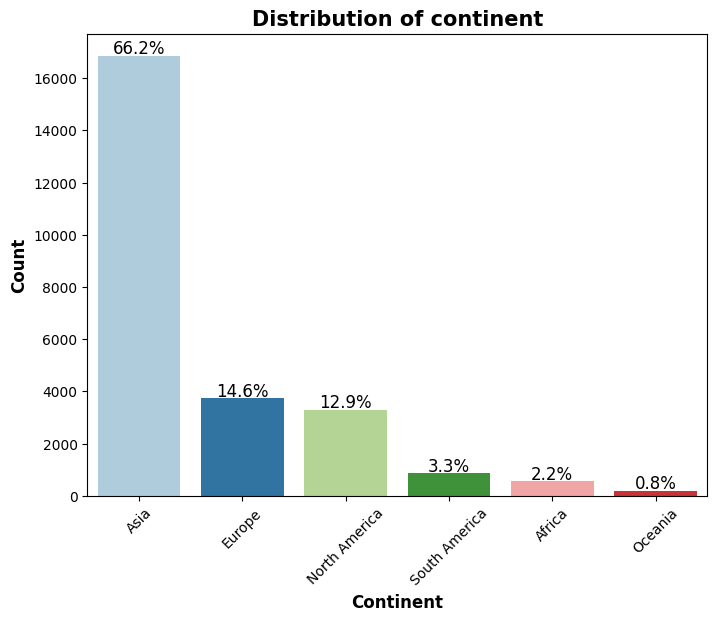

In [16]:
# Plot distribution of applicant continents
plot_barplot(visas_df, 'continent', 'Continent')

Observations:
* The overwhelming majority (66.2%) of applicants originate from Asia. Europe and North America are the next most represented, accounting for 14.6% and 12.9% of applicants respectively.
* South America, Africa, and Oceania contribute only a small percentage of applicants, perhaps due to differences in sociopolitical or economic ties to the host country, stricter visa requirements or, in the case of Oceania, the relatively smaller population size of the continent.

#### Level of Education

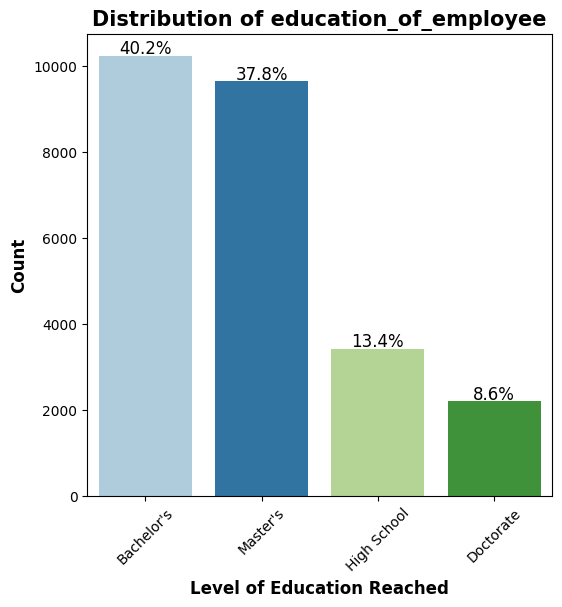

In [17]:
# Plot distribution of education level
plot_barplot(visas_df, 'education_of_employee', 'Level of Education Reached')

Observations:
* The majority of applicants have attained higher education, with Bachelor's and Master's degrees accounting for 40.2% and 37.8% of the dataset, respectively.
* The dominance of applicants with a higher level of education suggests that the visa process is geared towards high skilled individuals and professions that require advanced education.

#### Job Experience

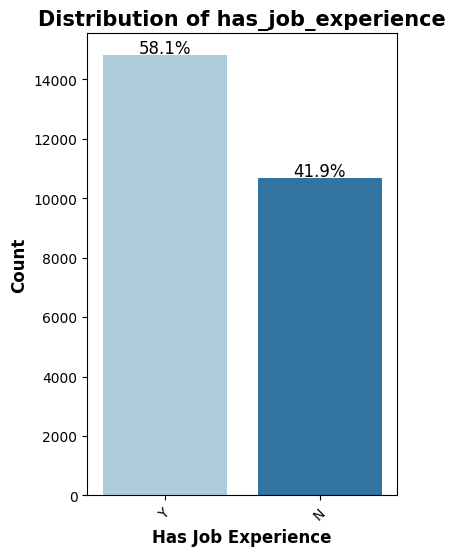

In [18]:
# Plot distribution of job experience
plot_barplot(visas_df, 'has_job_experience','Has Job Experience')

Observations:
* The majority of applicants, 51.8%, have job experience; nevertheless, the gap between those with job experience and those without is only 16.2%.
* The relatively even distribution between applicants with and without work experience suggests that the visa program is accessible to both experienced workers and those entering the workforce or transitioning into a new field.

#### Job Training Requirements

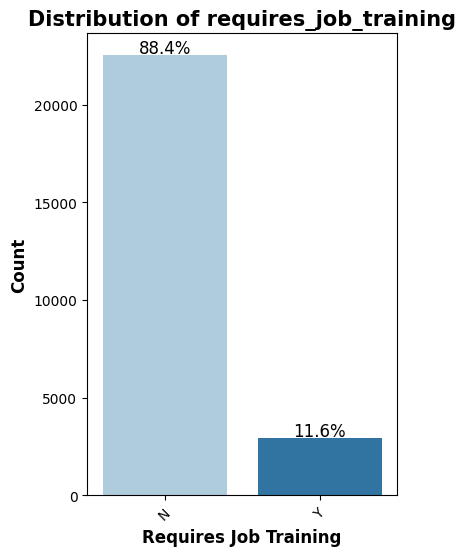

In [19]:
# Plot distribution of job training requirements
plot_barplot(visas_df, 'requires_job_training','Requires Job Training')

Observations:
* A substantial majority of applicants, 88.4%, do not require job training. This high percentage, coupled with the earlier analysis showing that a majority of applicants (58.1%) have job experience, suggests that a significant portion of visa seekers are ready for immediate deployment.
* In contrast, there is a disparity between the low percentage (11.65%) of applicants requiring training and the relatively high percentage (41.9%) of applicants lacking prior work experience. This suggests that applicants without job experience may possess strong educational backgrounds that enable them to begin working with minimal training, or are entering entry-level positions that rely mostly on on-the-job learning.

#### Company Size

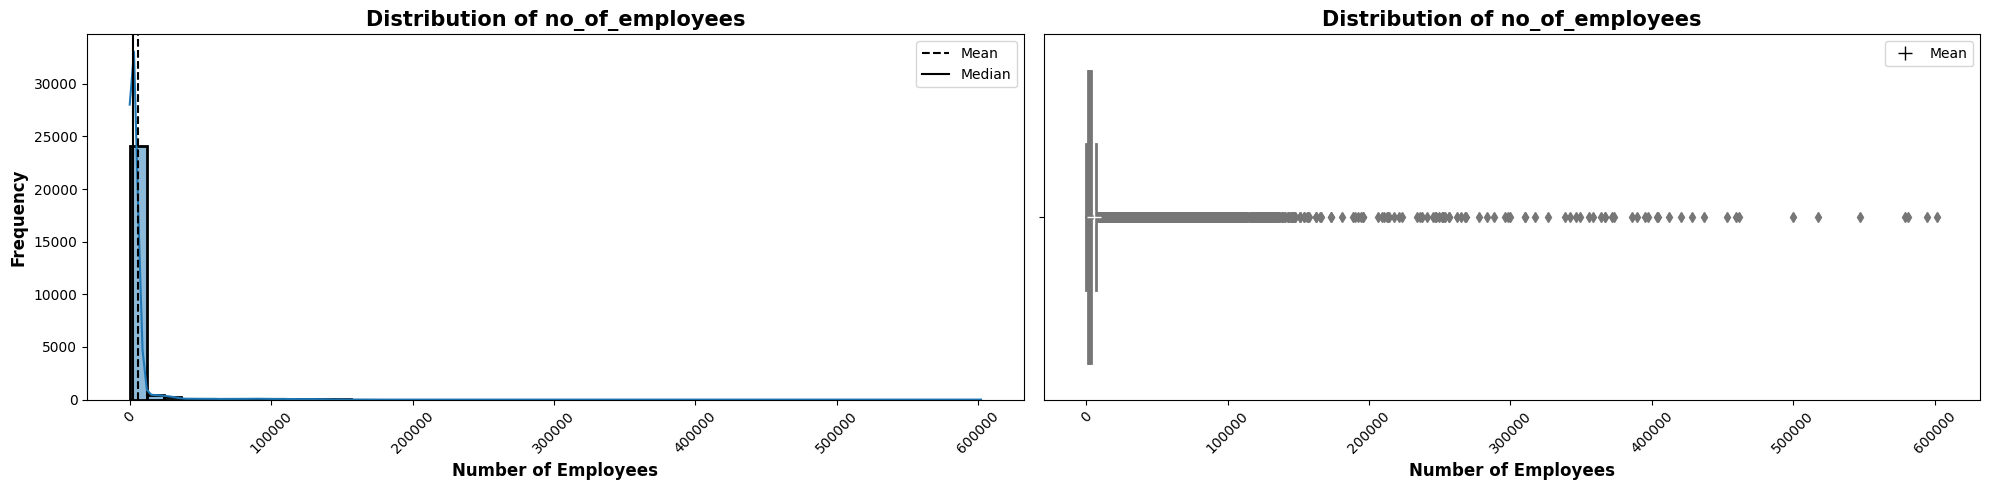

In [20]:
# Plot distribution of company size
plot_histogram_boxplot(visas_df, 'no_of_employees', 'Number of Employees',
                       histplot_bins=50, histplot_palette='mako')

Observations:
* The plots show a highly right-skewed distribution with steep drop-off, which indicates that the dataset is dominated by companies that have under 4,000 employees.
* Despite the prevalance of smaller companies, there are notable outliers with an exceptionally large number of employees. The presence of these data points aligns with the diverse corporate landscape - one in which multinational conglomerates coexist alongside startups.

#### Company Establishment Year

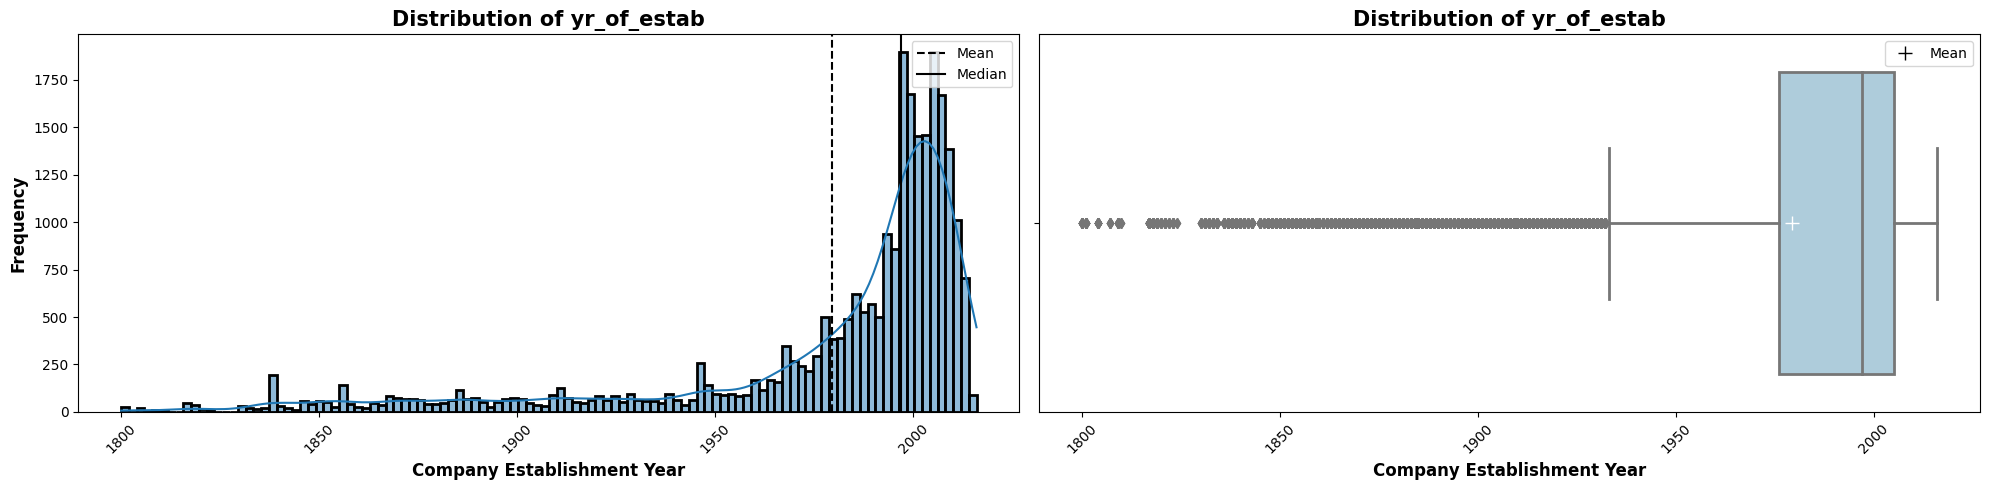

In [21]:
# Plot distribution of company size
plot_histogram_boxplot(visas_df, 'yr_of_estab', 'Company Establishment Year')

Observations:
* The histogram shows a left-skewed distribution of company establishment years, with a significant number of companies established in recent decades or perhaps an influx of visa applications from recently established companies.
* The plots show that there is a wide distribution of establishment years, which could have implications for the perceived stability of the company and, thus, visa success rate.

#### Intended Employment Region

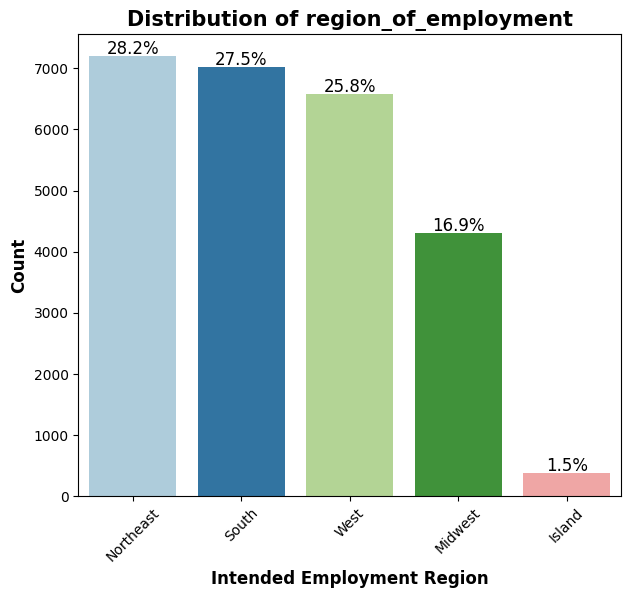

In [22]:
# Plot distribution of intended employment region
plot_barplot(visas_df, 'region_of_employment', 'Intended Employment Region')

Observations:
* The Northeast, South, and West regions have a relatively even distribution of intended employment, with 28.2%, 27.5%, and 25.8% respectively.
* The Midwest shows a moderate representation at 16.9%, which is significantly lower than the leading three regions, but is still notable.
* The Island region has only a minimal percentage of applicants (1.5%), perhaps as a result of limited job openings.

#### Prevailing Wage

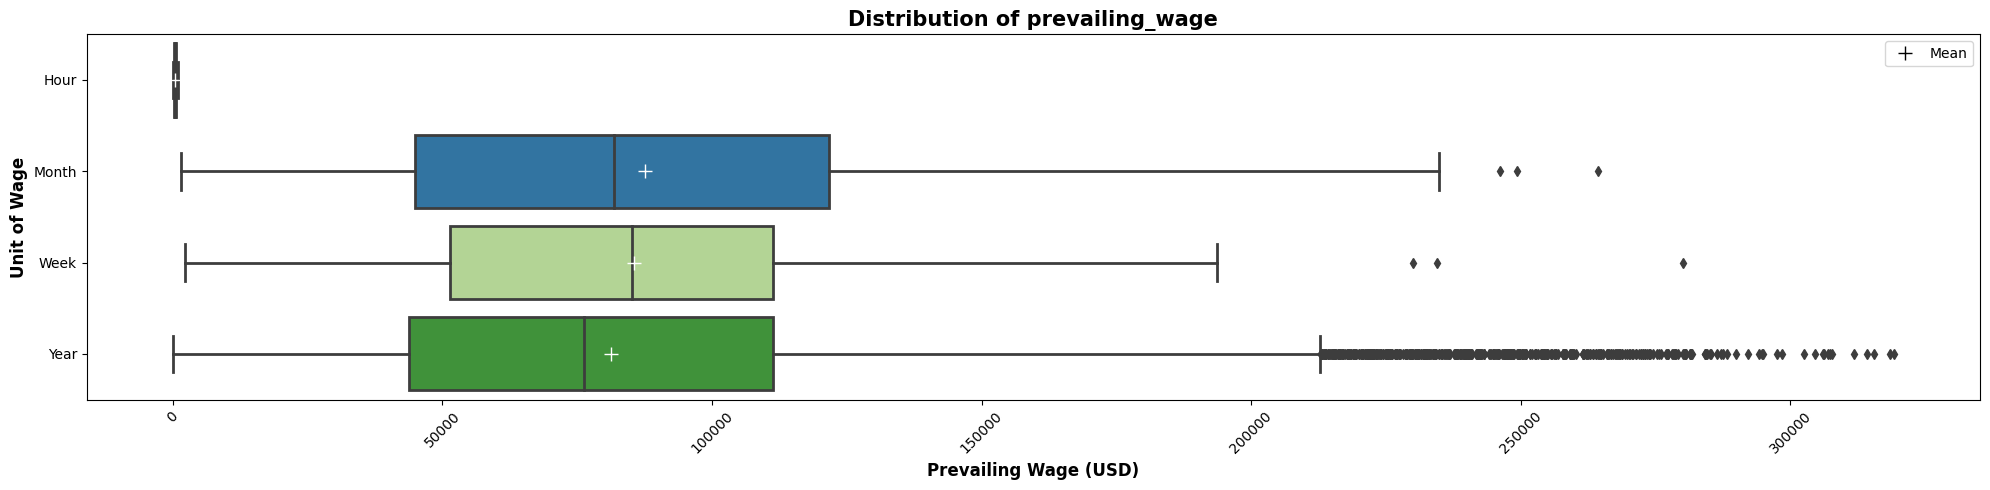

In [23]:
# Plot distribution of prevailing wage
plot_histogram_boxplot(visas_df, 'prevailing_wage', 'Prevailing Wage (USD)',
                       boxplot_y_feature='unit_of_wage',
                       boxplot_y_label='Unit of Wage',
                       show_plots = {'boxplot':  True})

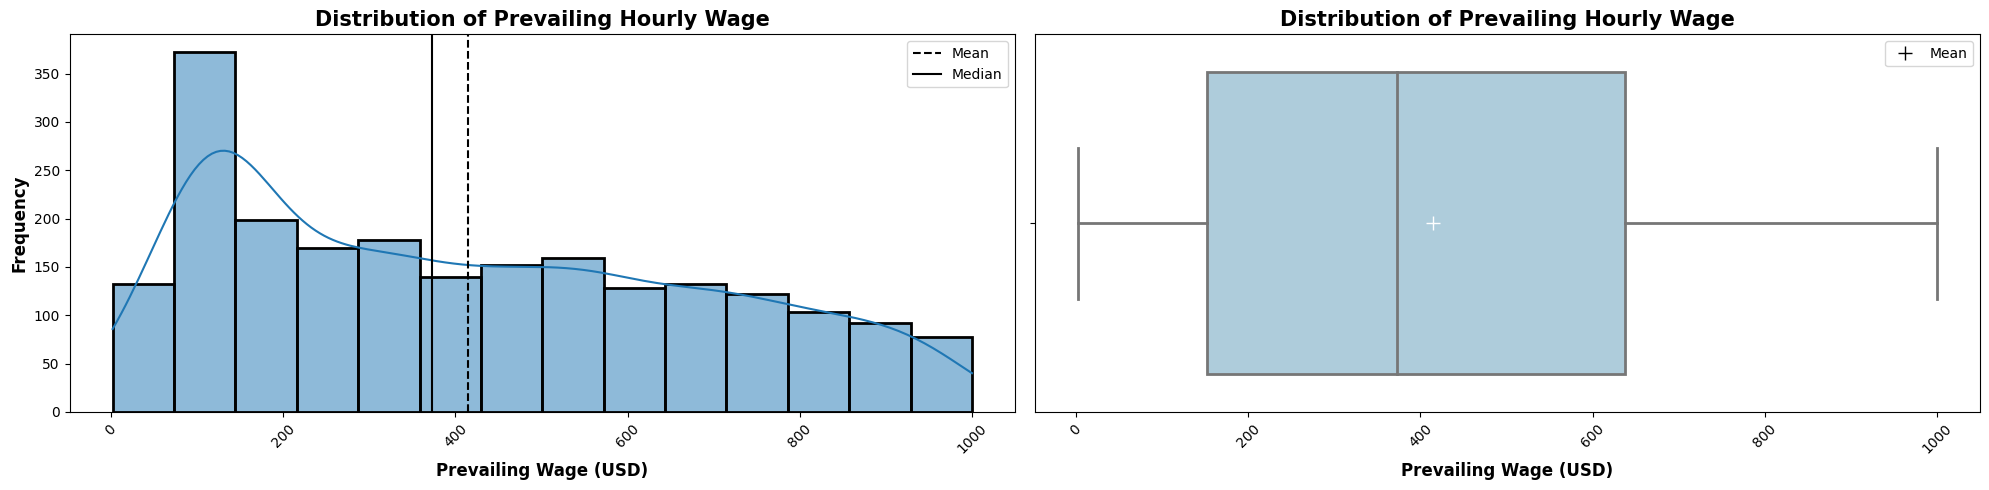

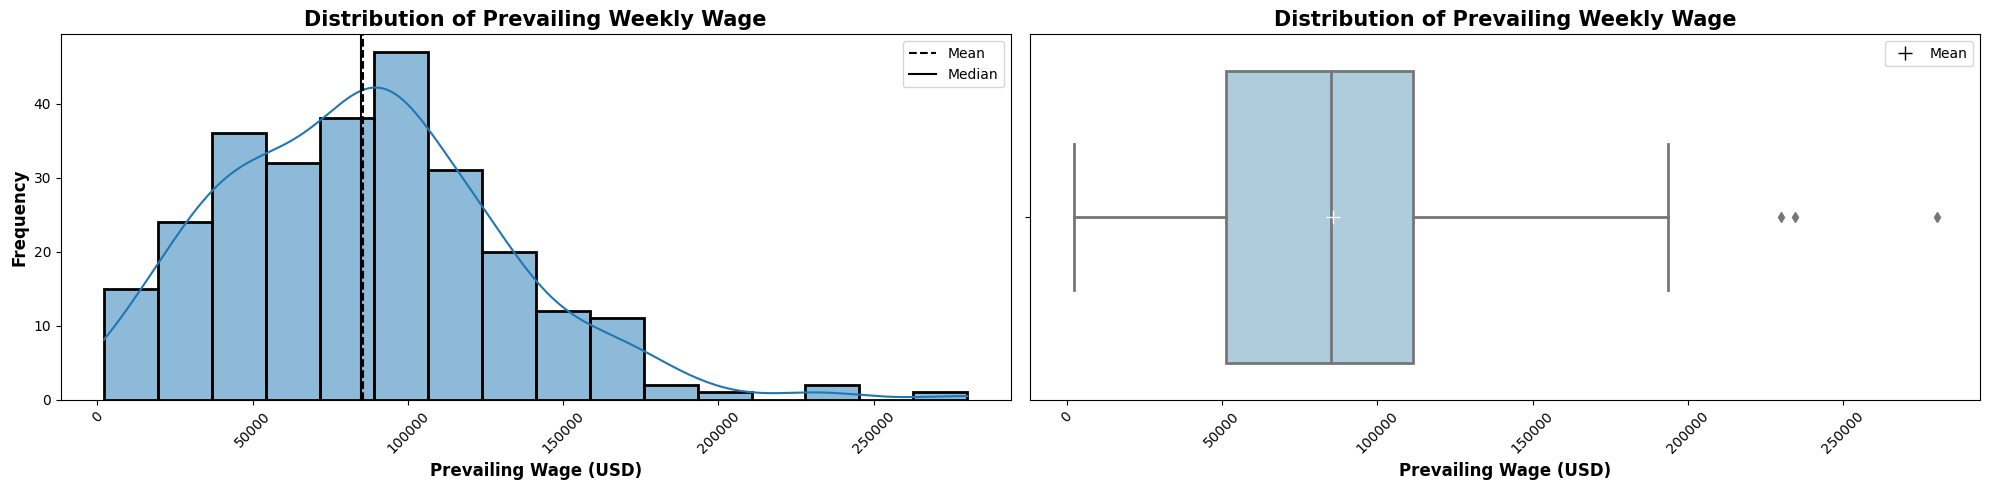

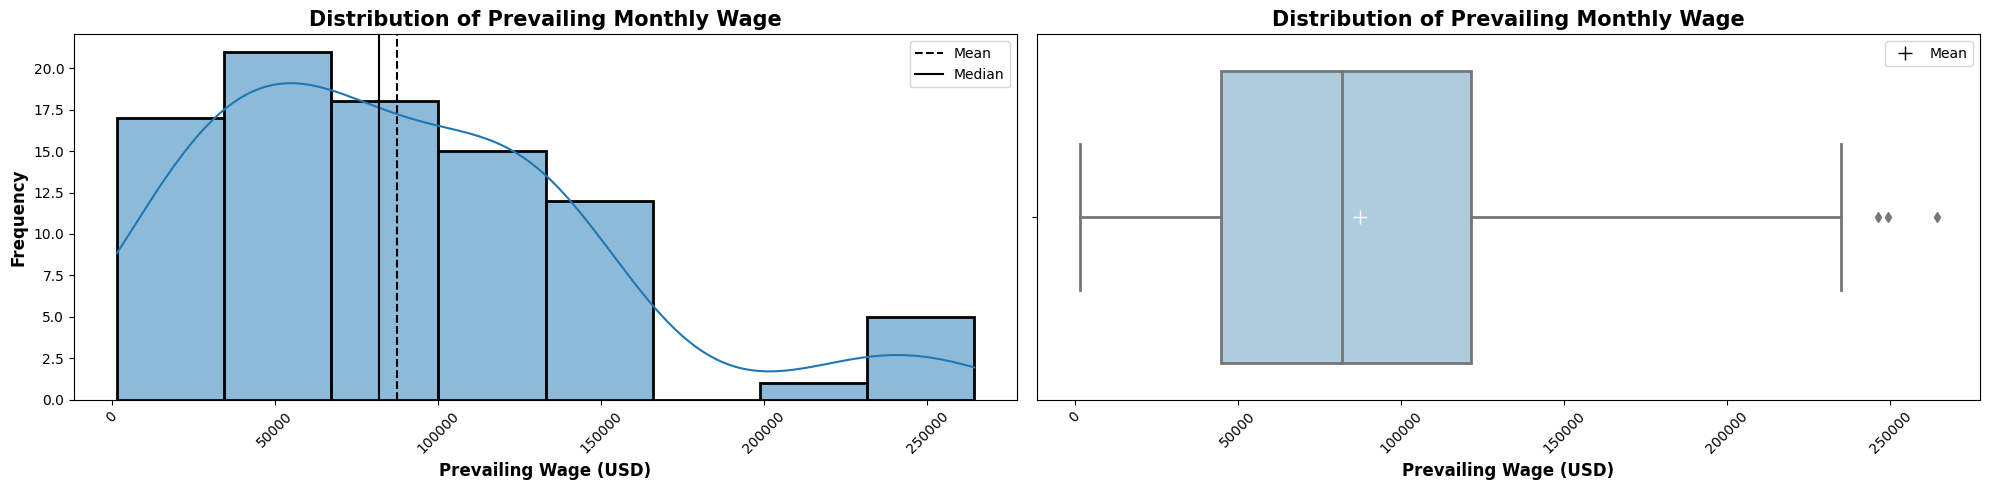

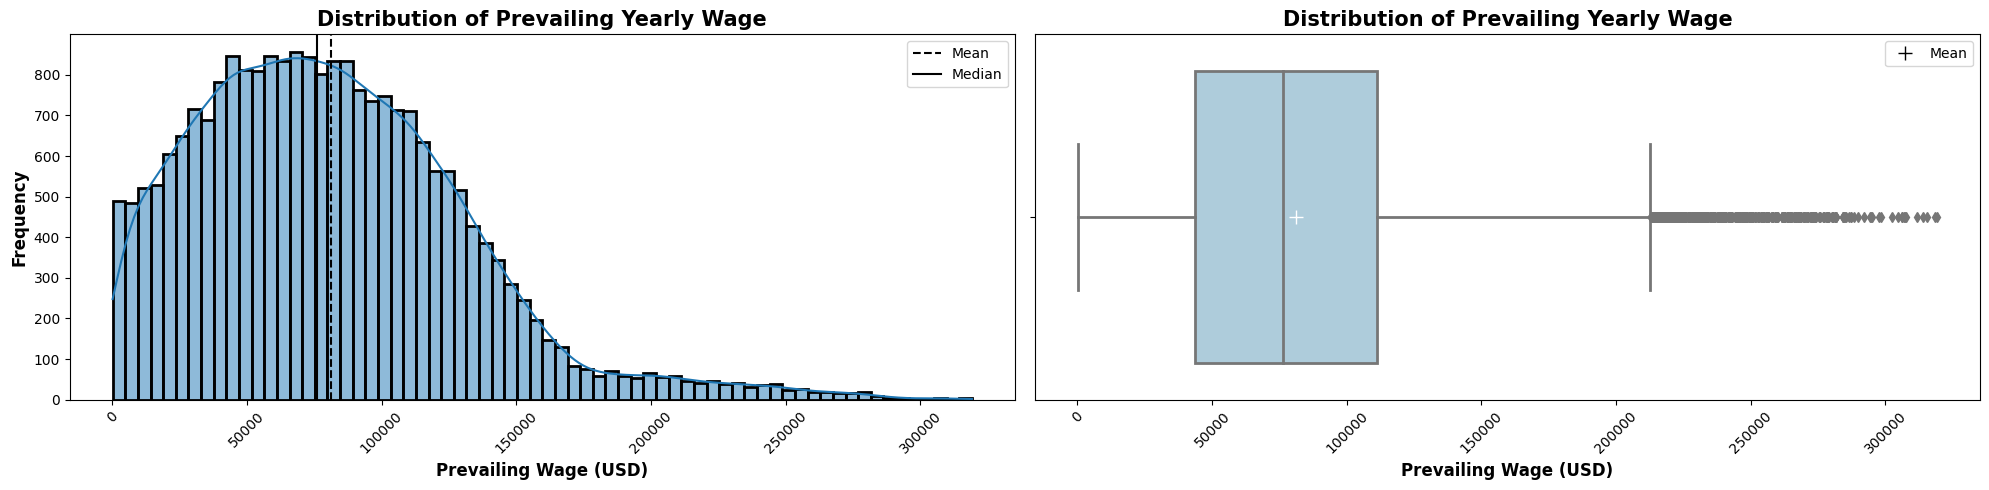

In [24]:
# Define specific order for units of wage for plots
units_of_wage = ['Hour', 'Week', 'Month', 'Year']

# Loop through each unique unit of wage
for unit in units_of_wage:
    # Filter data for the current unit of wage
    visas_df_eda = visas_df[visas_df['unit_of_wage'] == unit]

    # Plot distribution of prevailing wage
    plot_histogram_boxplot(visas_df_eda, 'prevailing_wage', 'Prevailing Wage (USD)',
                           title=f'Distribution of Prevailing {unit.capitalize()}ly Wage')

Observations:
* The boxplot for the hourly wages is extremely narrow and is clustered on the low end of the spectrum, suggesting that these jobs have less pay variability.
* The boxplot for yearly wages has a significant number of outliers beyond the upper quartile, indicating that the dataset likely encompasses highly specialized or executive level roles. The boxplots for monthly and weekly wages show more consistency and a limited number of outliers.
* Each prevailing wage, regardless of wage unit, is right-skewed, but the strength of the skew varies. The plot for hourly wages exhibits some uniformity for wages above $200 USD per hour, while the plot for yearly wages shows some symmetry around the mode.

#### Unit of Wage

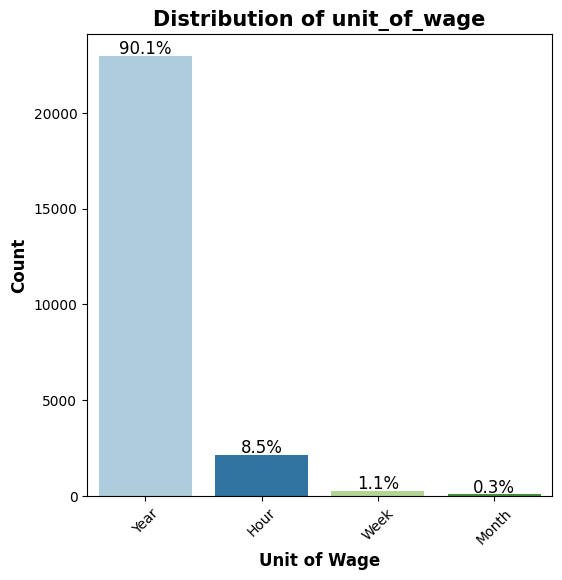

In [25]:
# Plot distribution of unit of wage
plot_barplot(visas_df, 'unit_of_wage', 'Unit of Wage')

Observations:
* The vast majority of wages (90.1%) are calculated on an annual basis, suggesting that most roles in the dataset are likely to be full-time positions.
* There is a relatively small proportion of jobs that pay on an hourly (8.5%), weekly (1.1%), or monthly (0.3%) basis.

#### Position Type

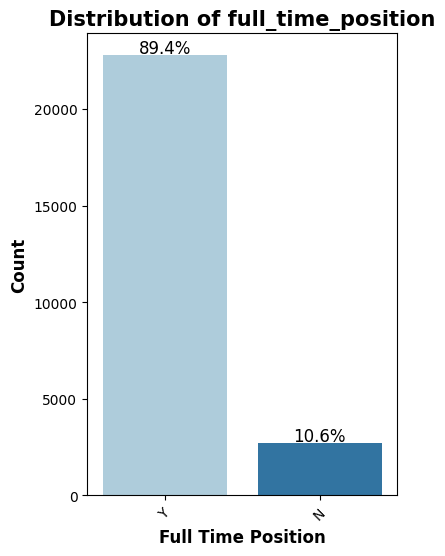

In [26]:
# Plot distribution of position type
plot_barplot(visas_df, 'full_time_position', 'Full Time Position')

Observations:
* As speculated during the wage unit analysis, a vast majority of roles (89.4%) in the dataset are full-time positions. This could imply that part-time or contract roles are less likely to receive company visa sponsorship.

#### Case Outcome

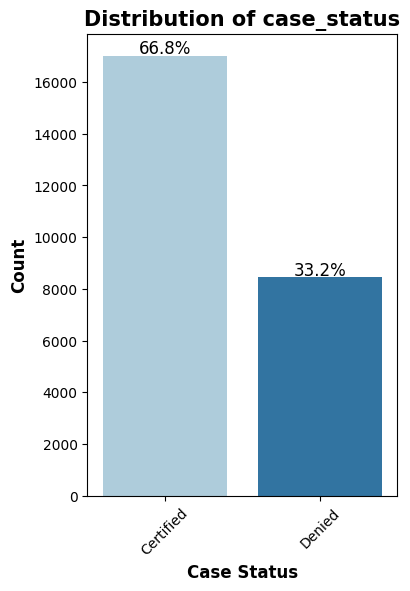

In [27]:
# Plot distribution of case status
plot_barplot(visas_df, 'case_status', 'Case Status')

Observations:
* The majority of cases (66.8%) were approved, however there is also a substantial proportion that was denied.

### Bivariate Analysis

#### Correlation

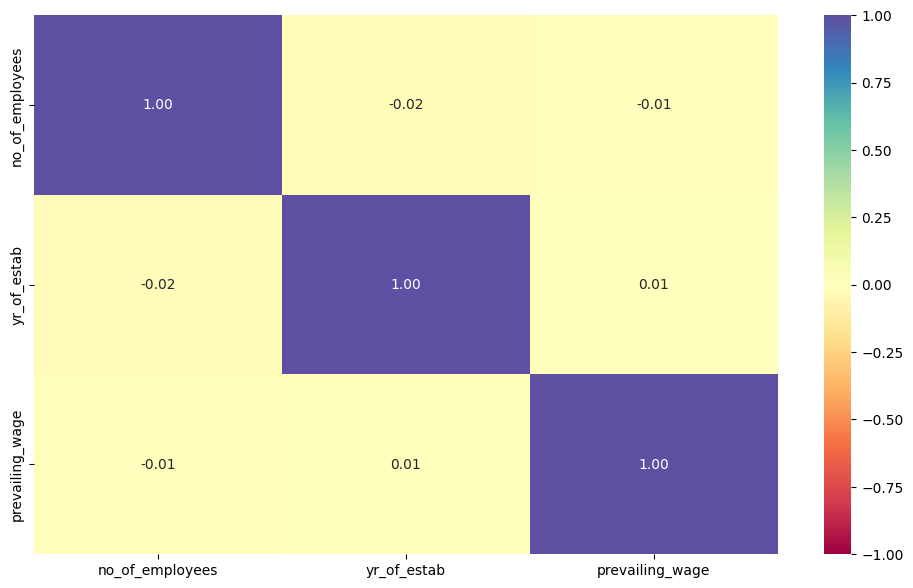

In [28]:
# Use heatmap to get high level overview of correlation
plt.figure(figsize=(12, 7))
sns.heatmap(visas_df.corr(numeric_only=True), annot=True, cmap='Spectral',
            vmin=-1, vmax=1, fmt='.2f');

Observations:
* There are no apparent correlations between the numerical features.

#### Relationship Between Employee Continent of Origin and Case Outcome

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


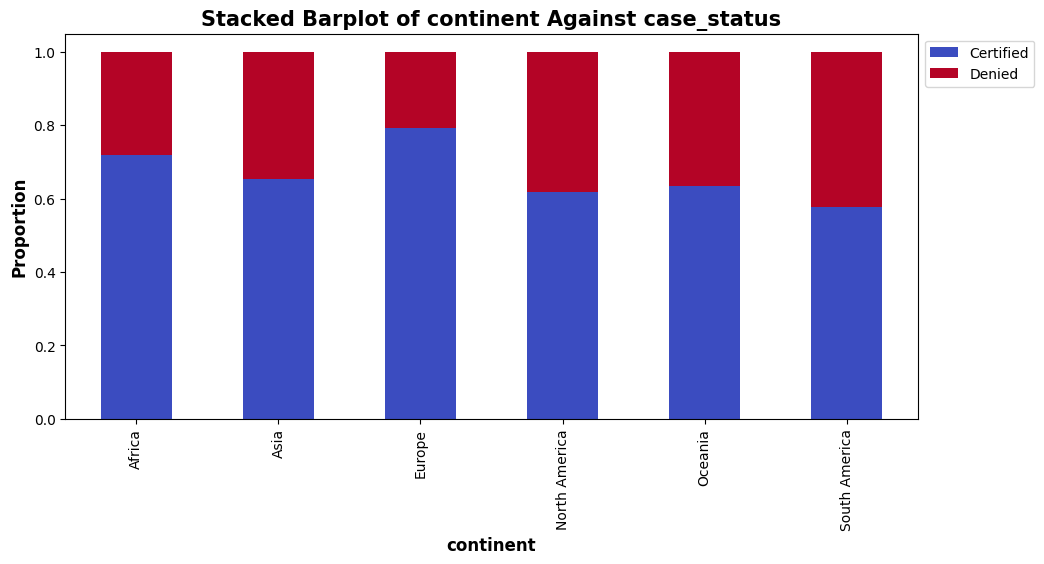

In [29]:
# Plot distribution with respect to case outcome
plot_stacked_barplot(visas_df, 'continent', 'case_status')

Observations:
* All continents have a higher proportion of certified cases compared to denied cases; however, the approval rate for South America is the least compared to other continents.
* Applicants from Europe have the highest visa certification rate.

#### Relationship Between Employee Education Level and Case Outcome

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


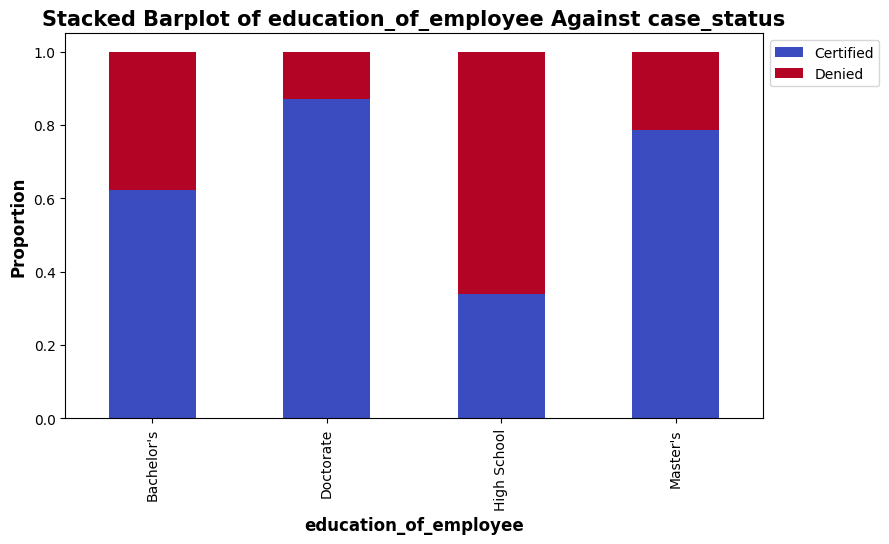

In [30]:
# Plot distribution with respect to case outcome
plot_stacked_barplot(visas_df, 'education_of_employee', 'case_status')

Observations:
* There appears to be a positive correlation between higher levels of education and an increased likelihood of visa approval.
* There is a significant increase in visa approval rate for candidates with university degrees.

#### Relationship Between Employee Job Experience and Case Outcome

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


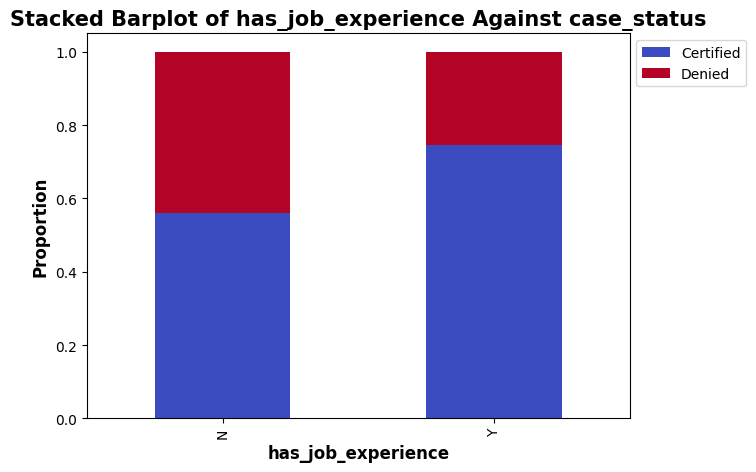

In [31]:
# Plot distribution with respect to case outcome
plot_stacked_barplot(visas_df, 'has_job_experience', 'case_status')

Observations:
* Applicants with prior job experience have a higher visa certification rate of 74.5%, compared to a rate of 56.1% for applicants without prior work experience.

#### Relationship Between Employee Training Requirements and Case Outcome

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


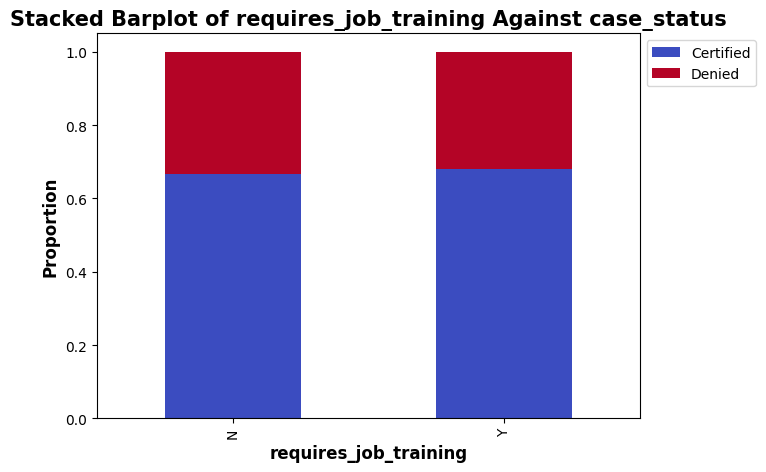

In [32]:
# Plot distribution with respect to case outcome
plot_stacked_barplot(visas_df, 'requires_job_training', 'case_status')

Observations:
* Visa approval rates remain similar at 66.6% for applicants not requiring training and 67.9% for those that do, suggesting that job training requirements have little influence on the case outcome.

#### Relationship Between Number of Employees and Case Outcome

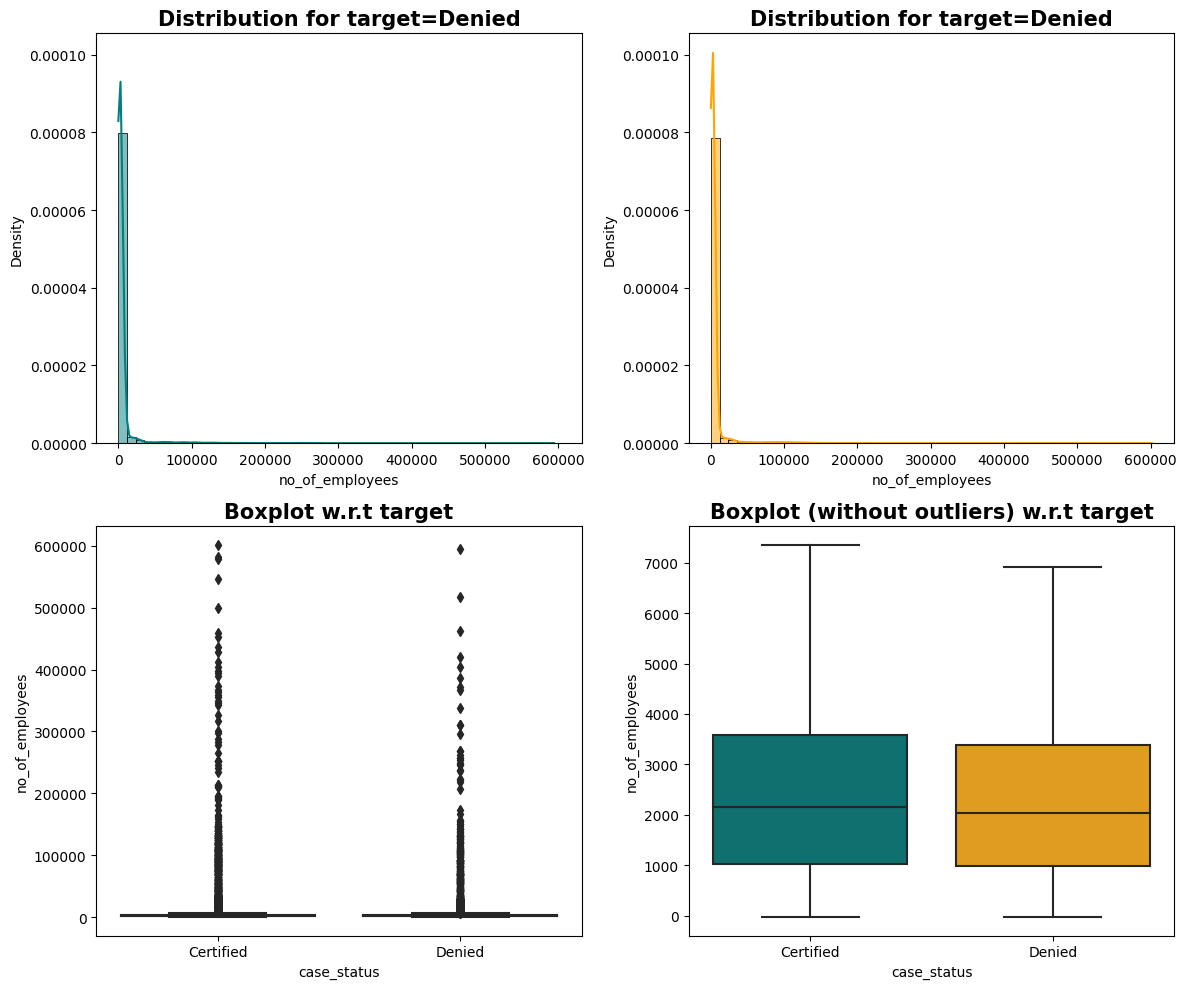

In [33]:
# Plot distribution with respect to case status
plot_distribution_wrt_target(visas_df, 'no_of_employees', 'case_status',
                             histplot_bins=50)

Observations:
* Both the 'Certified' and 'Denied' histograms show spikes near zero, indicating that most companies, regardless of the case outcome, have a smaller number of employees. Moreover, the distributions for both 'Certified' and 'Denied' cases appear similar. This is further confirmed by the boxplot without outliers.
* The boxplot without outliers shows a higher median for 'Certified' cases compared to 'Denied', suggesting that the majority of companies with certified visa cases tend to have a higher median employee count.

#### Relationship Between Company Year Established and Case Outcome

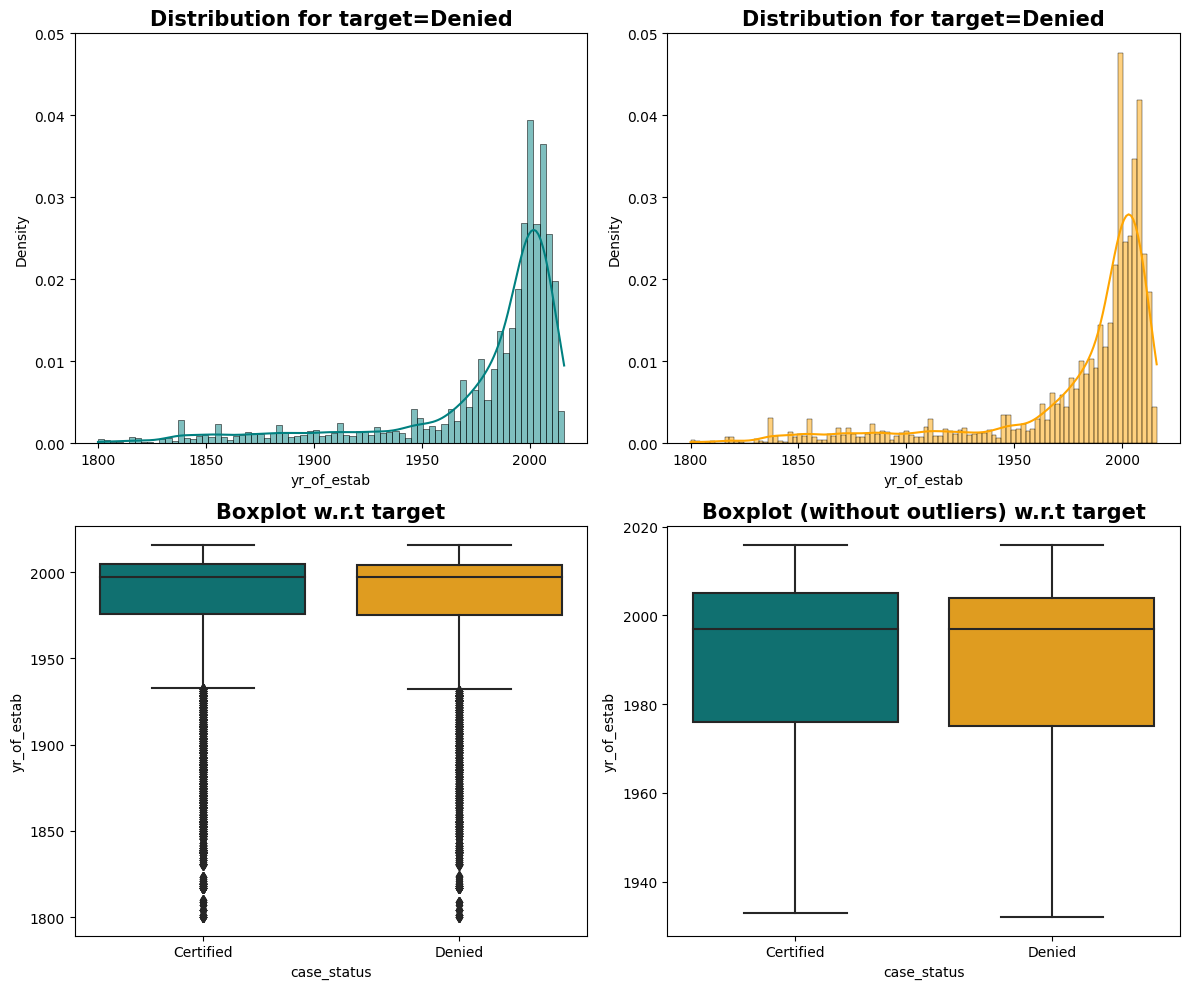

In [34]:
# Plot distribution with respect to case status
plot_distribution_wrt_target(visas_df, 'yr_of_estab', 'case_status')

Observations:
* In both the certified and denied cases, the median establishment year is relatively recent, suggesting that the age of a company is not a decisive factor in visa certification.
* There are several outliers in both the certified and denied boxplots, indicating that there are some visa cases associated with very old companies.

#### Relationship Between Region of Employment and Case Outcome

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


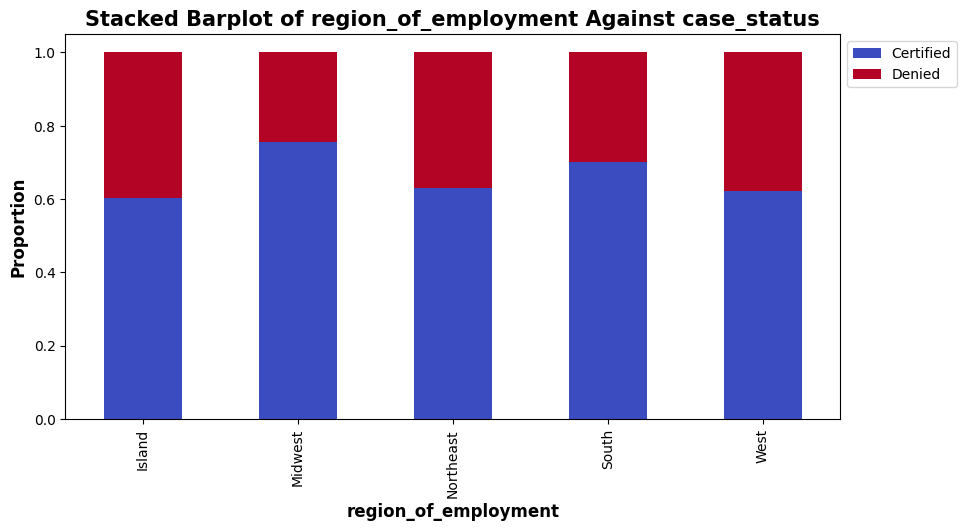

In [35]:
# Plot distribution with respect to case outcome
plot_stacked_barplot(visas_df, 'region_of_employment', 'case_status')

Observations:
* All regions have a higher proportion of certified cases compared to denied cases.
* The approval rate for the northeast, island, and west regions is the lowest compared to other regions, potentially due to factors such as higher application volumes compared to labor demands.
* Applicants for the midwest region have the highest visa certification rate.

#### Relationship Between Prevailing Wage and Case Outcome

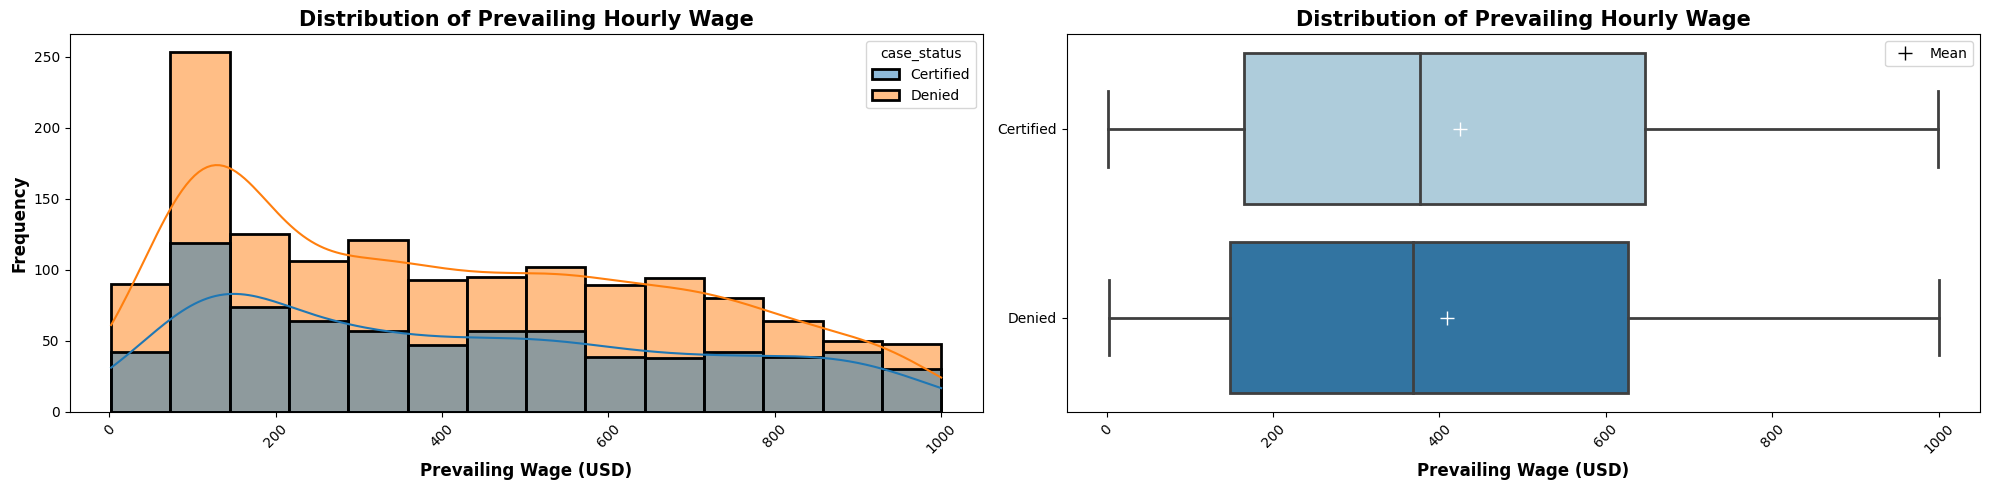

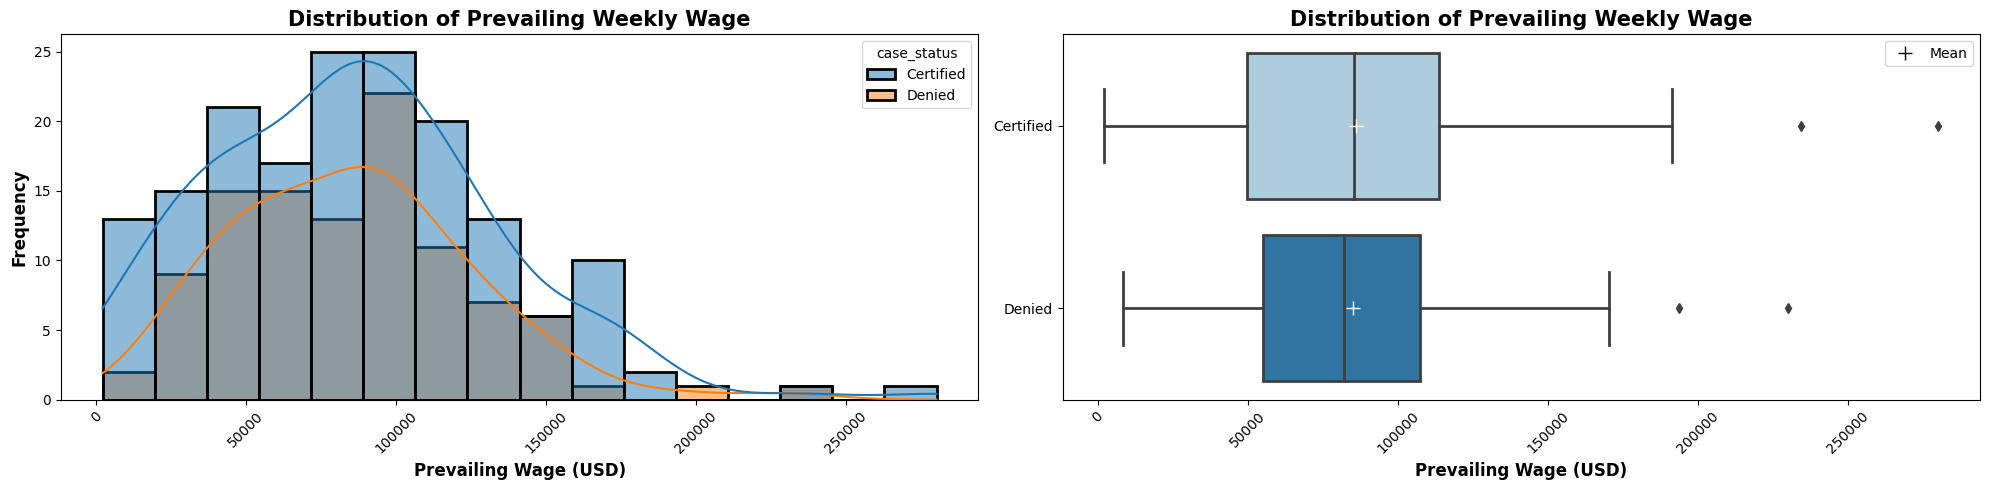

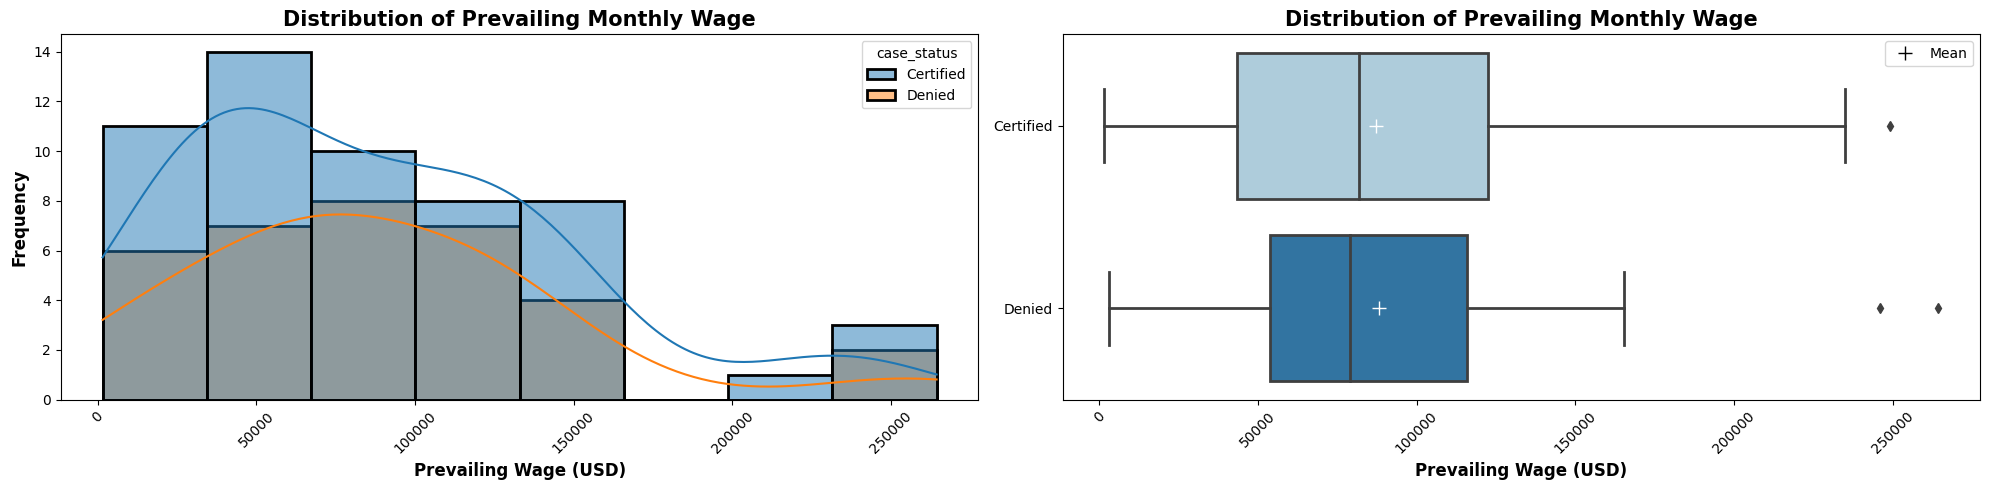

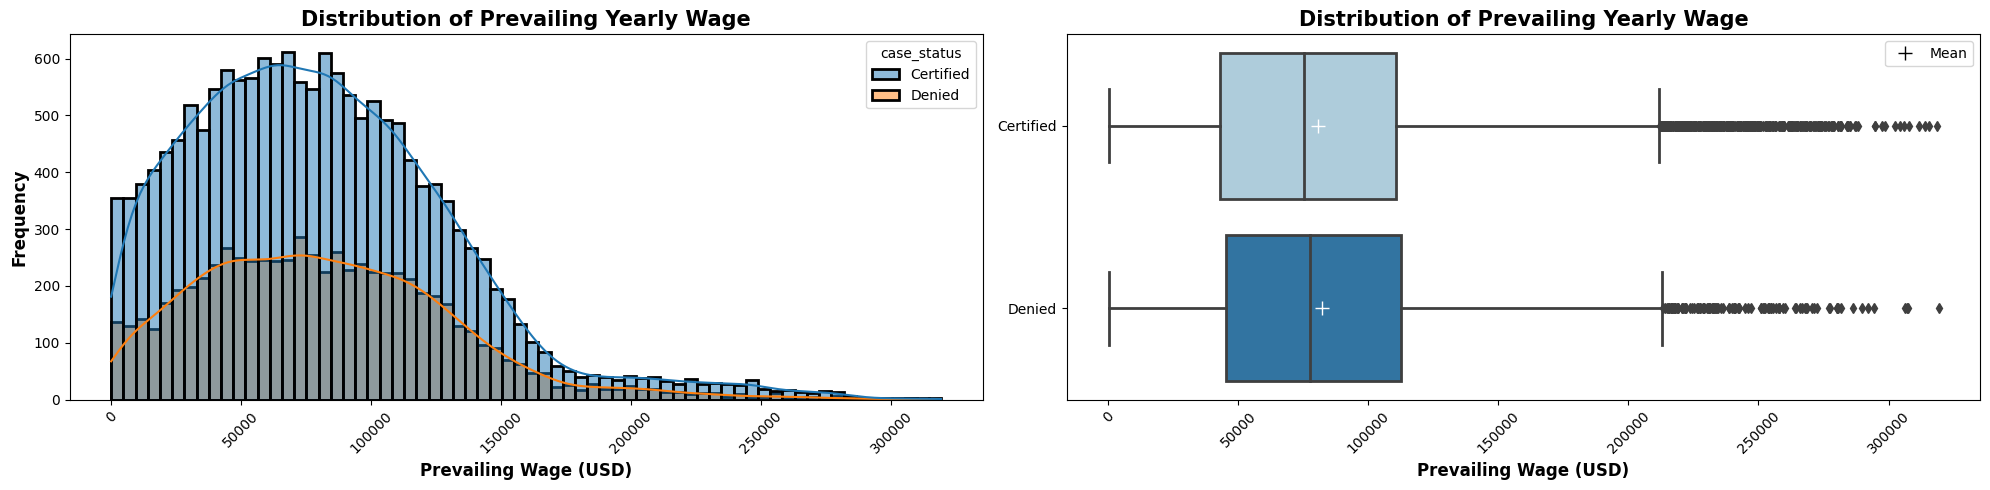

In [36]:
# Loop through each unique unit of wage
for unit in units_of_wage:
    # Filter data for the current unit of wage
    visas_df_eda = visas_df[visas_df['unit_of_wage'] == unit]

    # Plot distribution of prevailing wage
    plot_histogram_boxplot(visas_df_eda, 'prevailing_wage',
                           'Prevailing Wage (USD)',
                           title=f'Distribution of Prevailing {unit.capitalize()}ly Wage',
                           histplot_hue='case_status',
                           boxplot_y_feature='case_status')

Observations:
* Across all wage units, there is a visible right-skew pattern where the majority of wages is concentrated at the lower end of the spectrum, which is consistent with a higher number of visa cases being associated with lower wage offers.
* For all wage units, certified cases tend to have a higher median wage than certified cases.
* The interquartile range for 'Denied' cases is wider than for 'Certified' cases across all wage units, indicating greater variability in the prevailing wage for 'Denied' cases.
* It should be noted that the prevailing wage could be acting as a proxy for other factors, like the job's skill level, that are not directly observable in the data.
* The presence of outliers in denied cases suggests that applicants with higher than typical wages are also at risk of being denied.

#### Relationship Position Type and Case Outcome

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


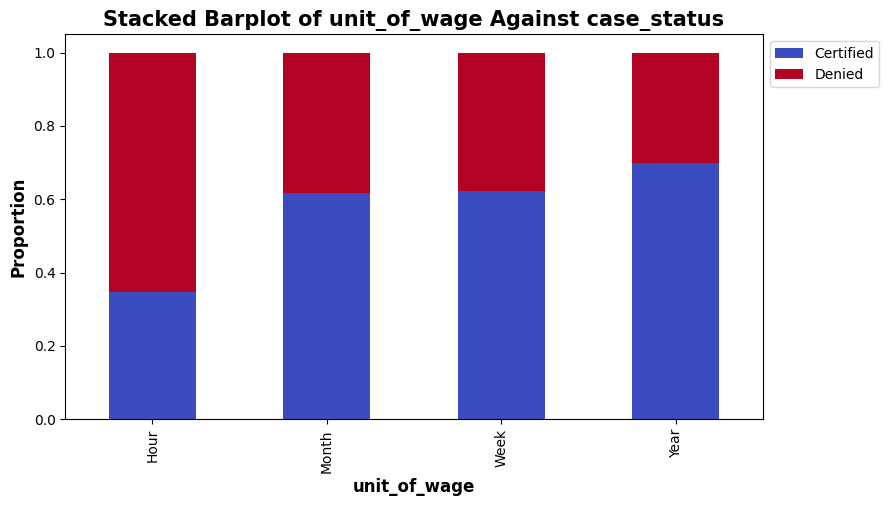

In [37]:
# Plot distribution with respect to case status
plot_stacked_barplot(visas_df, 'unit_of_wage', 'case_status')

Observations:
* Candidates with annual salary positions boast the highest visa approval rate at 69.9%, while monthly and weekly earners have similar approval rates of about 62%, and hourly wages have the lowest rate at 34.6%

#### Relationship Between Position Type and Case Outcome

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


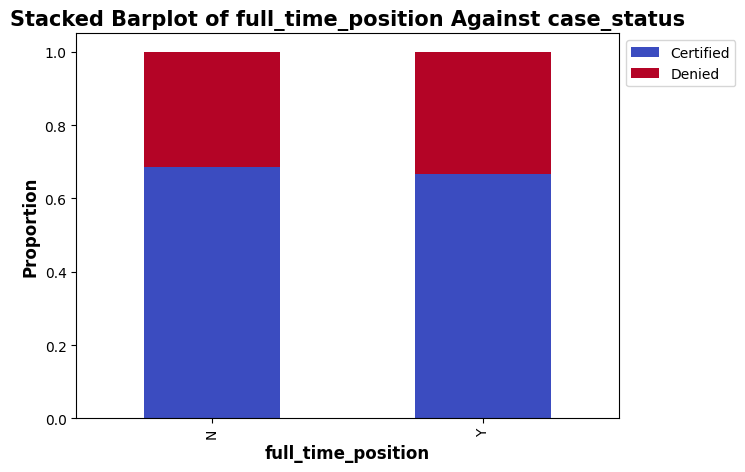

In [38]:
# Plot distribution with respect to case outcome
plot_stacked_barplot(visas_df, 'full_time_position', 'case_status')

Observations:
* The similar proportions of denied and certified cases in both full time and non-full time positions suggest that the position type does not have a significant impact on the likelihood of visa approval.

### Questions

1. **Those with higher education may want to travel abroad for a well-paid job. Does education play a role in visa certification?**

    * There appears to be a positive correlation between higher levels of education and an increased likelihood of visa approval.
    * There is a significant increase in visa approval rate for candidates with university degrees.

2. **How does the visa status vary across different continents?**

    * All continents have a higher proportion of certified cases compared to denied cases; however, the approval rate for South America is the least compared to other continents.
    * Applicants from Europe have the highest visa certification rate.

3. **Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

    * Applicants with prior job experience have a higher visa certification rate of 74.5%, compared to a rate of 56.1% for applicants without prior work experience.

4. **In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

  * Candidates with annual salary positions boast the highest visa approval rate at 69.9%.

5. **The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**
  * Across all wage units, there is a visible right-skew pattern where the majority of wages is concentrated at the lower end of the spectrum, which is consistent with a higher number of visa cases being associated with lower wage offers.
  * For all wage units, certified cases tend to have a higher median wage than certified cases.
  * The interquartile range for 'Denied' cases is wider than for 'Certified' cases across all wage units, indicating greater variability in the prevailing wage for 'Denied' cases.
  * The presence of outliers in denied cases suggests that applicants with higher than typical wages are also at risk of being denied.

## Data Preprocessing

### Utility Functions

In [39]:
def plot_numericals(dataframe, max_subplots_per_row=4, features=None,
                    plot_type='box', figsize=(15, 10)):
    """
    Plot all numerical columns in dataframe using box plots or histograms

    Parameters:
        data (DataFrame): The dataframe containing the data
        max_subplots_per_row (int): Max number of subplots per row
        features (list): List of all features to include, if None will plot all
        plot_type (str): Type of plot to create ('box' for box plots or 'hist' for histograms)
        figsize (tuple): The size of the figure (width, height)

    Returns:
        None
    """
    # Define styles
    label_fontdict = {'weight': 'bold', 'size': 8}
    plot_fontdict = {'weight': 'bold', 'size': 10}

    # Filter the dataframe to keep only the specified columns
    if features is not None:
        numerical_features = dataframe[features]
    else:
        # Select all numerical columns
        numerical_features = dataframe.select_dtypes(include=['number'])

    # Calculate the number of rows and columns for subplots
    num_features = numerical_features.shape[1]
    num_cols = min(num_features, max_subplots_per_row)
    num_rows = (num_features - 1) // num_cols + 1

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharey=True)

    for i, feature in enumerate(numerical_features.columns):
        # If there's only one row, use one-dimensional index
        if num_rows == 1 or num_cols == 1:
            ax = axes[i]
        else:
            # Determine subplot location based on desired number of subplots per row
            row, col = divmod(i, num_cols)
            ax = axes[row, col]

        if plot_type == 'box':
            # Plot box plot for each numerical column
            sns.boxplot(data=dataframe, x=feature, ax=ax)
            ax.set_title(f'Box Plot for {feature}', fontdict=plot_fontdict)
        elif plot_type == 'hist':
            # Plot histogram for each numerical column
            sns.histplot(data=dataframe, x=feature, kde=True, ax=ax)
            ax.set_title(f'Histogram for {feature}', fontdict=plot_fontdict)
        else:
          # Return an error for an unknown plot type
            plt.close(fig)
            raise ValueError(f"Unknown plot_type: {plot_type}. Use 'box' or 'hist'.")

        ax.set_xlabel(feature, fontdict=label_fontdict)

    # Remove any empty subplots
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

### Missing Value Treatment

The initial review revealed that although there are no explicitly missing values, there are instances of negative values in the `no_of_employees` column. Given that this is an impossible scenario, it will need to be addressed.

In [40]:
# Filter rows with non-positive number of employees
neg_employees = visas_df[visas_df['no_of_employees'] <= 0]

# Calculate the count and percentage of such rows
num_neg_employees = neg_employees.shape[0]
percent_neg_employees = (num_neg_employees / visas_df.shape[0]) * 100

print(f'There are {num_neg_employees} rows ({percent_neg_employees:.2f}%) with non-positive numbers of employees in the data.')

There are 33 rows (0.13%) with non-positive numbers of employees in the data.


Due to the small number of these errors, we opt to eliminate these rows from the dataset.

In [41]:
visas_df = visas_df[visas_df['no_of_employees'] > 0].copy()

### Feature Engineering

We will convert `yr_of_estab` to measure years since company establishment (`yrs_since_estab`). This transformation will standardize the data, improve its interpretability, and more accurately capture its temporal aspect.

In [42]:
# Use the current year to compute company age
curr_year = datetime.date.today().year
visas_df['yrs_since_estab'] = curr_year - visas_df['yr_of_estab']

In [43]:
# Drop old yr_of_estab column
visas_df = visas_df.drop('yr_of_estab', axis=1)

We must now examine the `prevailing_wage` feature, which currently uses varying units.

The disparity in units could potentially impact the accuracy and reliability of our prediction models. It may be biased towards units with larger values or lead to misinterpretation of the data.

To address this issue, we consider several options:
1. Convert `prevailing_wage` to a common wage unit
 * Simplifies the data by bringing it to a common scale, making it easier for models to interpret.
* Relies heavily on assumptions about part-time and full-time hours, which could introduce inaccuracies if these assumptions don't align well with the actual data.
2. Normalize `prevailing_wage` withing wage unit groups
 * Maintains the integrity of each wage unit by avoiding assumptions about working hours.
 * May not significantly impact tree-based models like Random Forests and boosting algorithms, as these models are less sensitive to feature scaling.
 * Relies on the assumption that future data will exhibit the same distribution.
3. Maintain existing `prevailing_wage`
 * Maintains the original data without introducing any assumptions or transformations, preserving the real-world values.
 * Different wage scales may lead to model misinterpretations.

Based on these factors, we will proceed with the first option and convert the `prevailing_wage` to a monthly wage unit. A monthly scale balances the granularity of hourly wages with the broader scope of annual salaries. Although this conversion involves certain assumptions, they are relatively standard, thus minimizing the likelihood of introducing substantial inaccuracies in the data.

For the scope of this project, we will opt for one specific treatment. However, it is important to note that in other contexts, it is advisable to conduct a thorough exploration of all available options.

In [44]:
# Conversion factors based on the following assumptions:
# - 4 weeks in a month
# - 40 hours per work week for full-time employment
# - 20 hours per work week for part-time employment

year_to_month = 1 / 12
week_to_month = 4
weekly_work_hours_full_time = 40
weekly_work_hours_part_time = 20

# Calculate monthly wages based on assumptions
visas_df.loc[:, 'monthly_wage'] = visas_df['prevailing_wage']

# Convert annual wages to monthly
annual_wage_mask = visas_df['unit_of_wage'] == 'Year'
visas_df.loc[annual_wage_mask, 'monthly_wage'] *= year_to_month

# Convert weekly wages to monthly
weekly_wage_mask = visas_df['unit_of_wage'] == 'Week'
visas_df.loc[weekly_wage_mask, 'monthly_wage'] *= week_to_month

# Convert hourly wages to monthly for full-time and part-time
full_time_mask = (visas_df['unit_of_wage'] == 'Hour') & (visas_df['full_time_position'] == 'Y')
part_time_mask = (visas_df['unit_of_wage'] == 'Hour') & (visas_df['full_time_position'] == 'N')

visas_df.loc[full_time_mask, 'monthly_wage'] *= (weekly_work_hours_full_time * week_to_month)
visas_df.loc[part_time_mask, 'monthly_wage'] *= (weekly_work_hours_part_time * week_to_month)

visas_df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,yrs_since_estab,monthly_wage
0,Asia,High School,N,N,14513,West,592.203,Hour,Y,Denied,16,94752.464
1,Asia,Master's,Y,N,2412,Northeast,83425.650,Year,Y,Certified,21,6952.137
2,Asia,Bachelor's,N,Y,44444,West,122996.860,Year,Y,Denied,15,10249.738
3,Asia,Bachelor's,N,N,98,West,83434.030,Year,Y,Denied,126,6952.836
4,Africa,Master's,Y,N,1082,South,149907.390,Year,Y,Certified,18,12492.283


In [45]:
# Drop prevailing_wage as it is no longer needed
visas_df = visas_df.drop('prevailing_wage', axis=1)

### Outlier Treatment

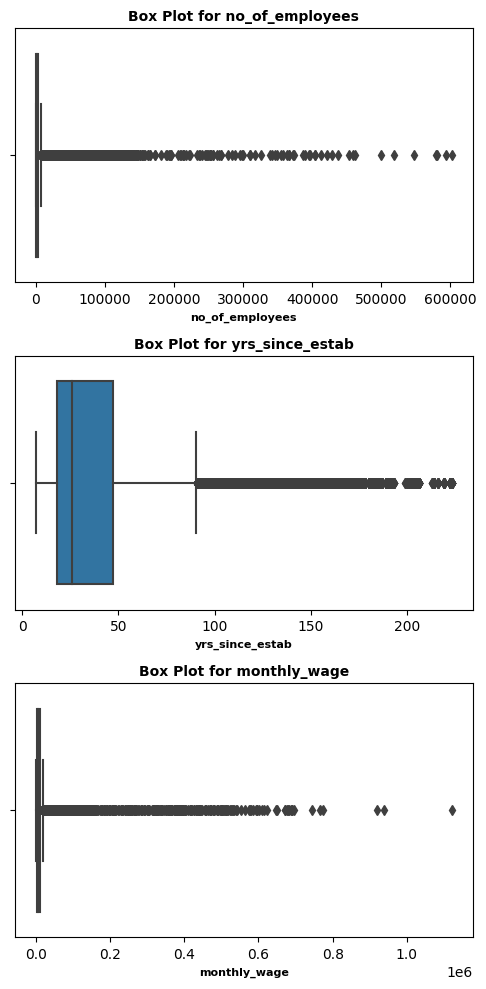

In [46]:
# Get overview of outliers for all non-binary features
outlier_columns = visas_df.select_dtypes(include=['number']).columns.tolist()
plot_numericals(visas_df, features=outlier_columns, max_subplots_per_row=1,
                figsize=(5, 10))

Given that the data appears to be valid and considering that ensemble techniques are generally robust to outliers, we will not treat the outliers at this stage of the analysis. It is important to note, however, that this generalization does not hold for boosting models, as they tend to be more sensitive to outliers due to their iterative training approach. We will revisit outlier handling if the need arises during subsequent stages.

### Post Feature Engineering EDA

#### Relationship Between Years Since Company Establishment and Case Outcome

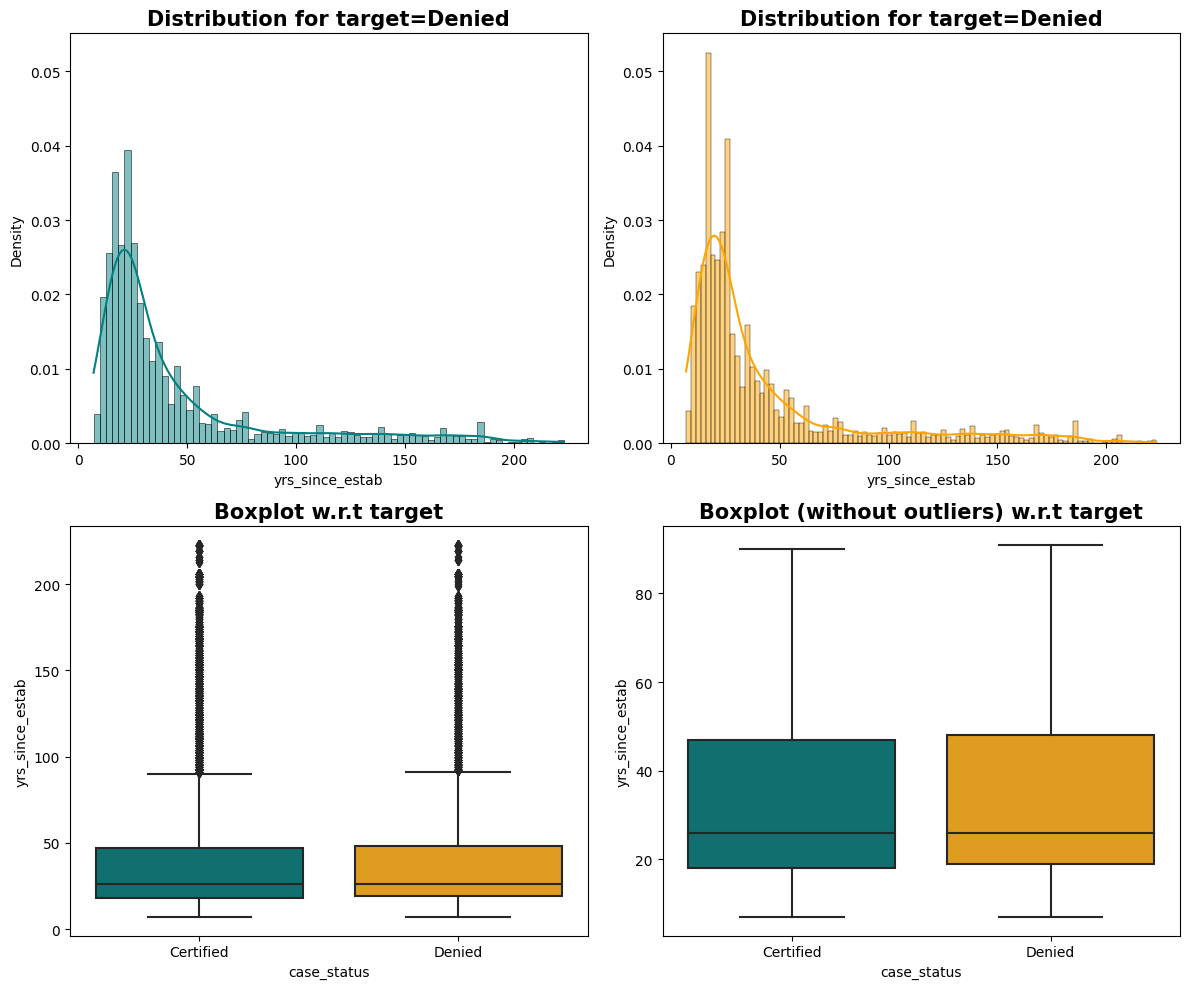

In [47]:
# Plot distribution with respect to case status
plot_distribution_wrt_target(visas_df, 'yrs_since_estab', 'case_status')

Observations:
* Both 'Certified' and 'Denied' histograms show peaks for companies established more recently, indicating that newer companies are more commonly involved in visa cases.
* The boxplots without outliers indicate that the median company age is relatively young for both certified and denied cases, with a slightly higher median for denied cases. This suggests that slightly older companies may have a higher proportion of denied cases, though the difference is not pronounced.
* The interquartile range for both certified and denied cases is fairly similar when outliers are not considered, indicating that the majority of companies, whether their visa cases are certified or denied, have been established within a similar time frame.

#### Relationship Between Monthly Wage and Case Outcome

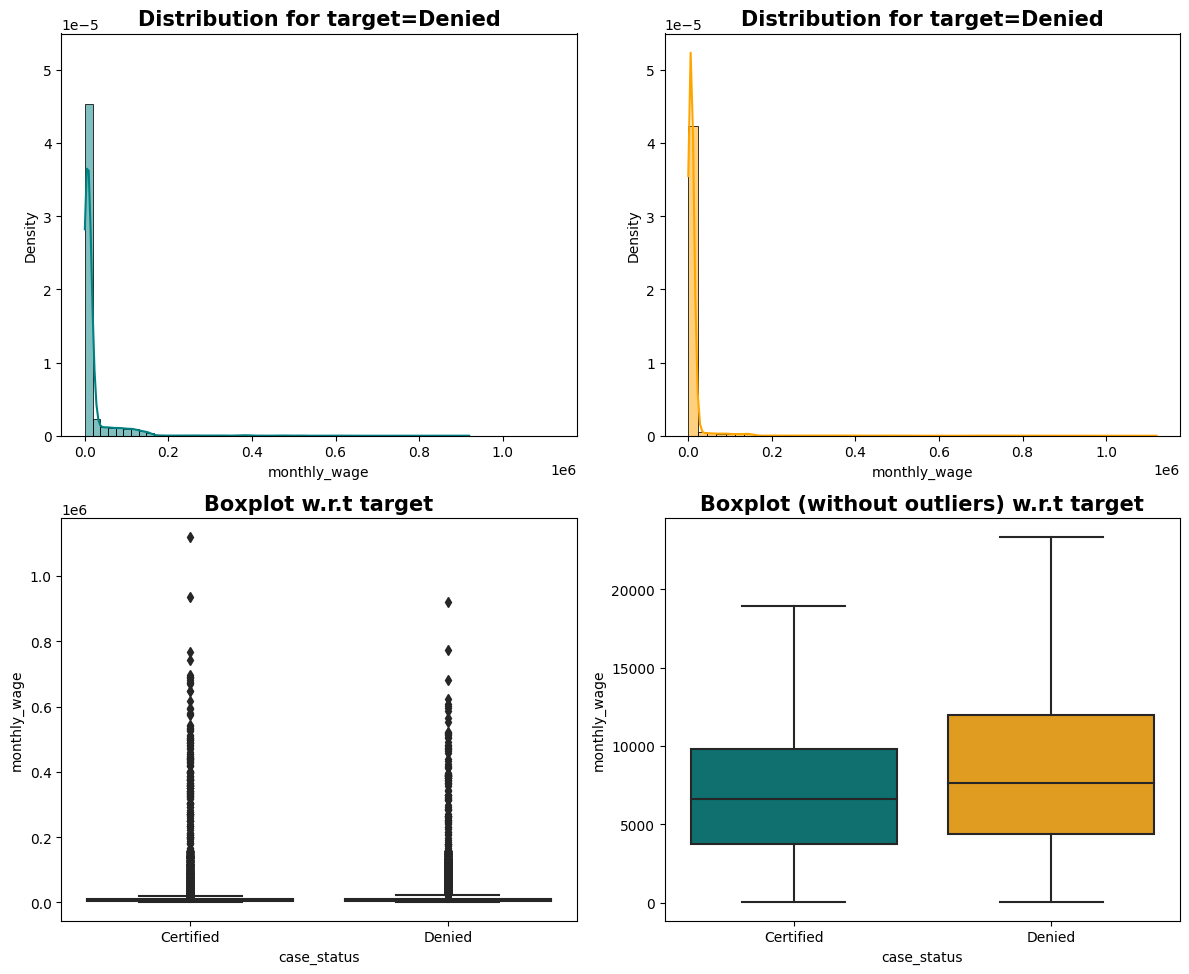

In [48]:
# Plot distribution with respect to case status
plot_distribution_wrt_target(visas_df, 'monthly_wage', 'case_status',
                             histplot_bins=50)

Observations:
* The histograms for both 'Certified' and 'Denied' are extremely skewed to the right, indicating that most of the monthly wages are clustered around the lower end of the wage spectrum.
* The presence of a wider spread of outliers in the 'Certified' category suggests that successful visa applications include a broader range of higher monthly wages.

The observations regarding `yrs_since_estab` and `monthly_wage` are consistent with the patterns we observed during the initial exploratory analysis of the underlying features. Thus, we can confidently advance to the model-building phase.

### Data Preparation for Modeling

#### Encode Categorical Data

In [49]:
encode_struct = {
    'case_status': {'Denied': 0, 'Certified': 1 },
    'has_job_experience': {'Y': 1, 'N': 0},
    'requires_job_training': {'Y': 1, 'N': 0},
    'full_time_position': {'Y': 1, 'N': 0},
    'education_of_employee': {"High School": 1, "Bachelor's": 2, "Master's": 3,
                              "Doctorate": 4}
}

one_hot_cols = ['continent','region_of_employment','unit_of_wage']

# Encode categorical binary and ordinal variables with numerical values
visas_df = visas_df.replace(encode_struct)

# Perform one-hot encoding on the specified columns
visas_df = pd.get_dummies(visas_df, columns=one_hot_cols, drop_first=True)

for column in visas_df.columns[visas_df.dtypes == 'category']:
    visas_df[column] = visas_df[column].astype('int64')

visas_df.sample(10)

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,full_time_position,case_status,yrs_since_estab,monthly_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
12797,3,0,0,5874,1,0,48,7867.320,0,0,1,0,0,0,0,0,1,0,0,1
13102,1,0,1,1682,1,0,29,19918.400,0,0,1,0,0,0,0,0,1,0,0,0
6139,4,0,0,1829,1,1,11,10222.897,1,0,0,0,0,0,0,0,1,0,0,1
7591,2,1,1,1420,1,1,11,7654.763,1,0,0,0,0,0,1,0,0,0,0,1
8414,2,1,0,484,1,1,146,8859.617,1,0,0,0,0,0,0,1,0,0,0,1
23118,4,1,0,1924,1,1,133,9570.469,0,1,0,0,0,0,0,0,1,0,0,1
18385,2,1,0,2049,1,0,25,1989.502,1,0,0,0,0,0,1,0,0,0,0,1
16099,3,1,0,2803,1,1,25,1720.455,0,0,1,0,0,0,1,0,0,0,0,1
12481,3,0,0,623,1,0,14,10406.554,0,0,1,0,0,0,1,0,0,0,0,1
21033,4,0,0,1254,1,1,72,3600.124,0,1,0,0,0,0,0,0,1,0,0,1


#### Separation of Independent and Dependent Variables

In [50]:
# Separate the data into independent and dependent variables
X = visas_df.drop(['case_status'], axis=1)
Y = visas_df['case_status']

#### Creation of Training and Testing Sets

In [51]:
# Split the data into a 70:30 split between training and testing datasets
test_proportion = 0.3

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=test_proportion,
                                                    random_state=1,
                                                    stratify=Y)

print('Number of rows in train data =', X_train.shape[0])
print('Number of rows in test data =', X_test.shape[0])
print('Percentage of classes in training set:')
print(Y_train.value_counts(normalize=True))
print('Percentage of classes in test set:')
print(Y_test.value_counts(normalize=True))

Number of rows in train data = 17812
Number of rows in test data = 7635
Percentage of classes in training set:
1   0.668
0   0.332
Name: case_status, dtype: float64
Percentage of classes in test set:
1   0.668
0   0.332
Name: case_status, dtype: float64


## Model Evaluation

### Utility Functions

In [52]:
def model_performance_classification_sklearn(model, X_train, Y_train, X_test,
                                             Y_test):
    """
    Computes various performance metrics for a classification model.

    Args:
        model: The trained classification model
        X_train: Independent data (features) from the training set
        Y_train: Dependent data (target) from the training set
        X_test: Independent data (features) from the test set
        Y_test: Dependent data (target) from the test set

    Returns:
        Dataframe with metrics
    """
    # Predicting using the independent variables
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Calculate metrics for the training set
    train_acc = accuracy_score(Y_train, pred_train)
    train_recall = recall_score(Y_train, pred_train)
    train_precision = precision_score(Y_train, pred_train)
    train_f1 = f1_score(Y_train, pred_train)

    # Calculating metrics for the test set
    test_acc = accuracy_score(Y_test, pred_test)
    test_recall = recall_score(Y_test, pred_test)
    test_precision = precision_score(Y_test, pred_test)
    test_f1 = f1_score(Y_test, pred_test)

    # Constructing metrics DataFrame
    performance_metrics = pd.DataFrame(
        {
            'Accuracy': [train_acc, test_acc],
            'Recall': [train_recall, test_recall],
            'Precision': [train_precision, test_precision],
            'F1': [train_f1, test_f1],
        },
        index=['Training', 'Testing']
    )

    return performance_metrics

In [53]:
def confusion_matrix_sklearn(model, predictors, target, data_type='Training'):
    """
    Plots the confusion matrix with absolute counts and percentages.

    Args:
        model: The classification model
        predictors: The predictor or independent variables
        target: The dependent variable
        data_type: A string indicating the dataset type ('Training' or 'Testing')
          for the title

    Returns:
        None
    """

    # Predict using the independent variables
    y_pred = model.predict(predictors)

    # Get the confusion matrix
    cm = confusion_matrix(target, y_pred)

    # Format labels to show counts and percentages
    labels = np.asarray(
        [
            ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(f'Confusion Matrix for {data_type} Data')
    plt.show()

### Key Metrics

**Background**

The model's performance in predicting visa application outcomes is crucial because incorrect predictions can lead to significant consequences:

1. **Incorrect Approval:** Incorrectly approving a visa that should have been denied may result in an unsuitable candidate obtaining a job, thereby depriving a U.S. citizen of the opportunity.

2. **Incorrect Denial:** Incorrectly denying a visa application that should be approved may lead to the loss of a valuable human resource that could have contributed to the U.S. economy.


**Metric Analysis**

Both scenarios are critical due to their potential impact on work opportunities and the economy. To improve the model's performance and mitigate these risks, we consider the following key metrics:

1. **Precision**: Measures the proportion of correct positive predictions among all positive predictions made.
 * Prevents unqualified visa approvals, but might lead to missing qualified candidates.
 * This is important if the cost of wrongly approving a visa is higher than missing a qualified applicant.

2. **Recall**: Measures the proportion of actual positives that are correctly identified.
 * Ensures qualified candidates are not missed, but may increase unqualified approvals
 * This is important if the cost of rejecting a qualified applicant is higher than accepting an unqualified one.

3. **F1 Score**: Balances precision and recall, suitable when both types of errors are equally critical.
 * Offers a balanced approach, but may not be ideal if one type of error is more critical than the other.


**Metric Selection**

As we lack information on the relative costs and risks of false positives versus false negatives, we will focus on optimizing the **F1 score** because it provides a balanced measure of precision and recall.

## Decision Tree Classifier


### Model Building

In [54]:
# Build decision tree model
dtree = DecisionTreeClassifier(criterion='gini', class_weight='balanced',
                               random_state=1)
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Model Evaluation

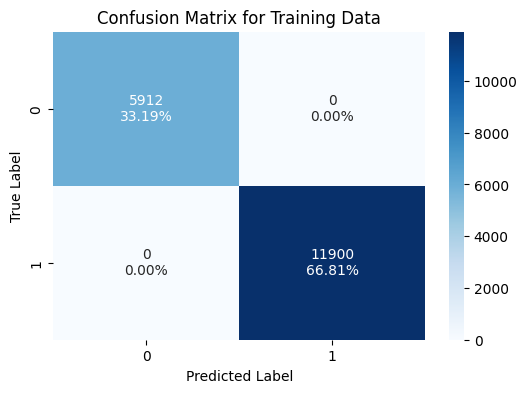

In [55]:
# Create confusion matrix
confusion_matrix_sklearn(dtree, X_train, Y_train)

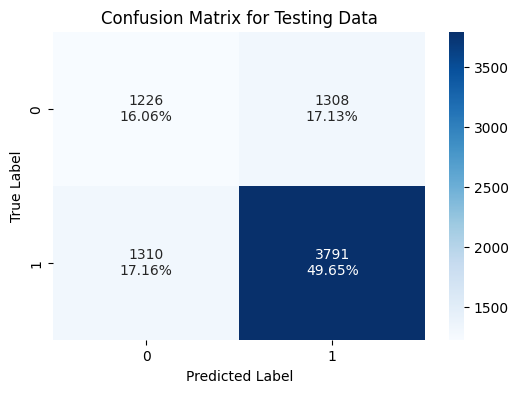

In [56]:
# Create confusion matrix
confusion_matrix_sklearn(dtree, X_test, Y_test, data_type='Testing')

In [57]:
# Check performance of model
dtree_perf = model_performance_classification_sklearn(dtree, X_train, Y_train,
                                                      X_test, Y_test)
dtree_perf

,Accuracy,Recall,Precision,F1
Training,1.000,1.000,1.000,1.000
Testing,0.657,0.743,0.743,0.743


Observations:
* The steep drop in performance from the training set to the testing set is clear evidence that the decision tree is overfitting the data.

### Hyperparameter Tuning

In [58]:
# Build model with balanced class weights to handle imbalance
dtree_tuned = DecisionTreeClassifier(random_state=1, class_weight='balanced')

# Grid of potential parameters
parameters = {
    'max_depth': np.arange(2, 10, 2),
    'min_samples_split': [0.001, 0.005, 0.01],
    'max_leaf_nodes' : np.arange(2, 22, 2),
    'min_impurity_decrease': [0.0001, 0.001, 0.01]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=6,
                       min_impurity_decrease=0.0001, min_samples_split=0.001,
                       random_state=1)

#### Model Evaluation

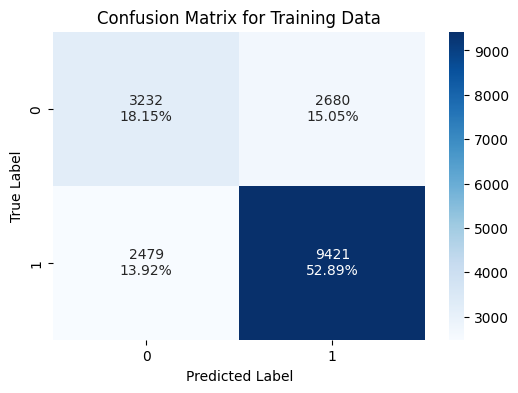

In [59]:
# Create confusion matrix
confusion_matrix_sklearn(dtree_tuned, X_train, Y_train)

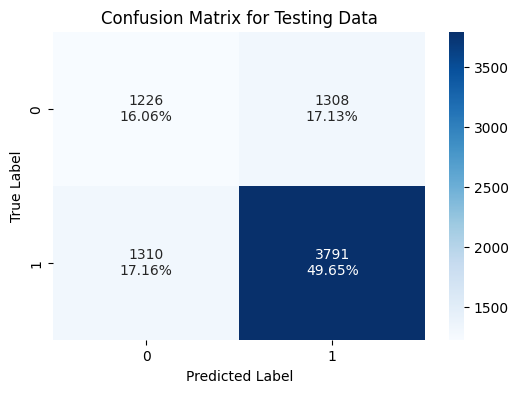

In [60]:
# Create confusion matrix
confusion_matrix_sklearn(dtree, X_test, Y_test, data_type='Testing')

In [61]:
# Check performance of model
dtree_tuned_perf = model_performance_classification_sklearn(dtree_tuned,
                                                            X_train, Y_train,
                                                            X_test, Y_test)
dtree_tuned_perf

,Accuracy,Recall,Precision,F1
Training,0.710,0.792,0.779,0.785
Testing,0.708,0.781,0.782,0.782


Observations:
* The near identical F1 scores between training (0.785) and testing (0.782) datasets, suggests that the model generalizes well to unseen data and is a reasonably good model for prediction.

## Bagging Classifier


### Model Building

In [62]:
# Build the model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, Y_train)

BaggingClassifier(random_state=1)

#### Model Evaluation

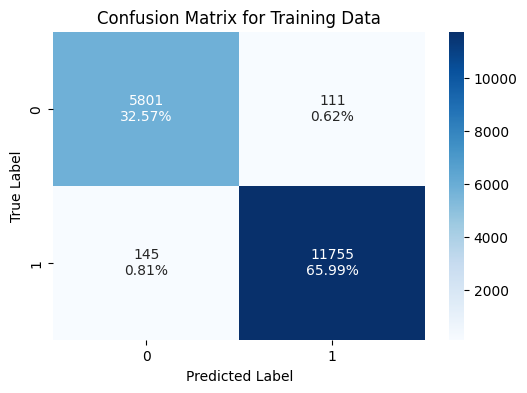

In [63]:
# Create confusion matrix
confusion_matrix_sklearn(bagging, X_train, Y_train)

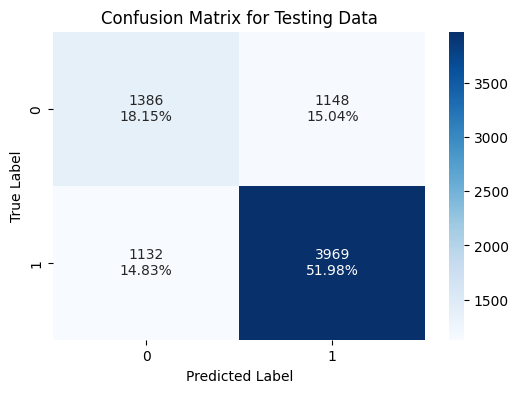

In [64]:
# Create confusion matrix
confusion_matrix_sklearn(bagging, X_test, Y_test, data_type='Testing')

In [65]:
bagging_perf = model_performance_classification_sklearn(bagging,
                                                        X_train, Y_train,
                                                        X_test, Y_test)
bagging_perf

,Accuracy,Recall,Precision,F1
Training,0.986,0.988,0.991,0.989
Testing,0.701,0.778,0.776,0.777


Observations:
* As with the untuned decision tree, the untuned bagging classifier exhibits a significant decline in performance when applied to the testing set, an indication of overfitting.

### Hyperparameter Tuning

In [66]:
# Build model for hyperparameter tuning
bagging_tuned = BaggingClassifier(random_state=1)

# Grid of potential parameters
parameters = {
    'max_samples': [0.5, 0.6, 0.7, 0.8],
    'max_features': [0.5, 0.6, 0.7],
    'n_estimators' : np.arange(60, 100, 10)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
bagging_tuned.fit(X_train, Y_train)

BaggingClassifier(max_features=0.6, max_samples=0.5, n_estimators=90,
                  random_state=1)

#### Model Evaluation

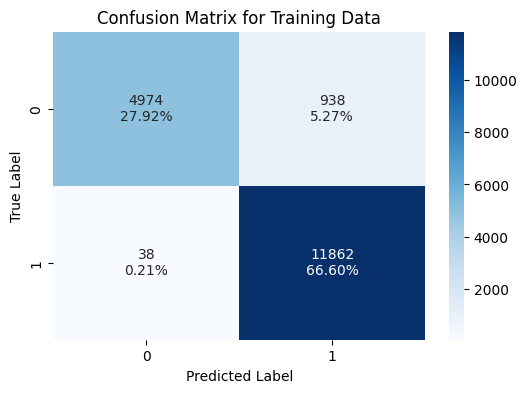

In [67]:
# Create confusion matrix
confusion_matrix_sklearn(bagging_tuned, X_train, Y_train)

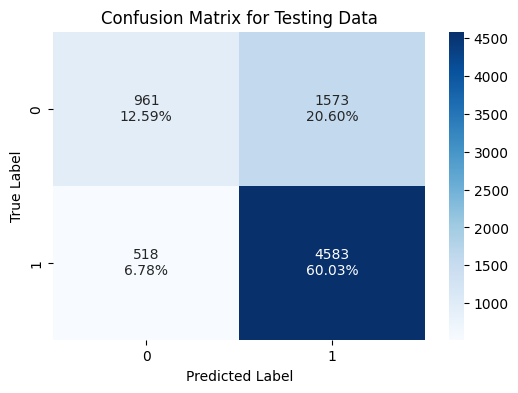

In [68]:
# Create confusion matrix
confusion_matrix_sklearn(bagging_tuned, X_test, Y_test, data_type='Testing')

In [69]:
# Check performance of model
bagging_tuned_perf = model_performance_classification_sklearn(bagging_tuned,
                                                              X_train, Y_train,
                                                              X_test, Y_test)
bagging_tuned_perf

,Accuracy,Recall,Precision,F1
Training,0.945,0.997,0.927,0.960
Testing,0.726,0.898,0.744,0.814


Observations:
* Although the degree of overfitting was lessened, there is still a notable performance gap between the training and testing results. The F1-score in particular drops from 0.960 to 0.814 between the training and testing data.
* However, the F1-score has improved from the initial bagging classifier's 0.777 to 0.814 on the testing data.

## Random Forest Classifier


### Model Building

In [70]:
# Build the model
rf = RandomForestClassifier(random_state=1, class_weight='balanced',
                            oob_score=True, bootstrap=True)
rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=1)

#### Model Evaluation

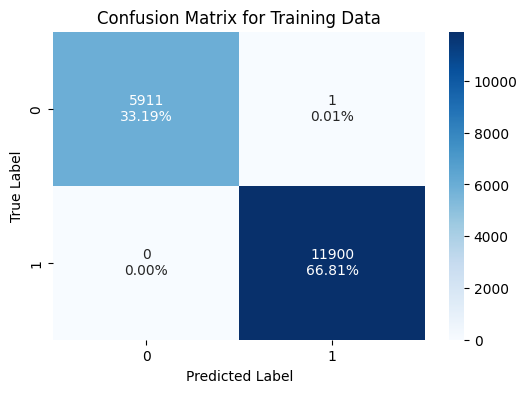

In [71]:
# Create confusion matrix
confusion_matrix_sklearn(rf, X_train, Y_train)

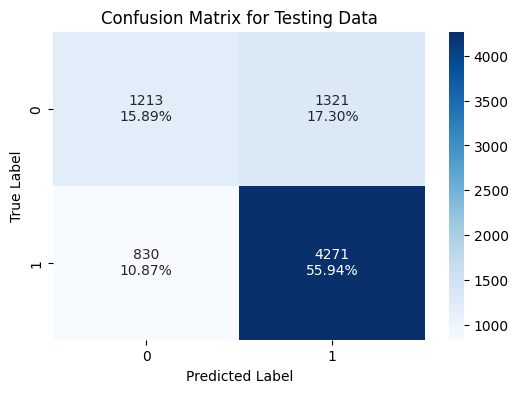

In [72]:
# Create confusion matrix
confusion_matrix_sklearn(rf, X_test, Y_test, data_type='Testing')

In [73]:
# Check performance of model
rf_perf = model_performance_classification_sklearn(rf, X_train, Y_train, X_test,
                                                   Y_test)
rf_perf

,Accuracy,Recall,Precision,F1
Training,1.000,1.000,1.000,1.000
Testing,0.718,0.837,0.764,0.799


Observations:
* The untuned random forest classifier achieves an F1-score of 0.799, outperforming the tuned (0.782) decision tree on the testing data. However, the untuned random forest classifier is still affected by significant overfitting.

### Hyperparameter Tuning

In [74]:
# Build model with balanced class weights to handle imbalance
rf_tuned = RandomForestClassifier(random_state=1, class_weight='balanced',
                                  oob_score=True, bootstrap=True)

# Grid of potential parameters
parameters = {
    'n_estimators':np.arange(100, 200, 15),
    'max_features':np.arange(0.5, 1, 0.1),
    'max_depth': [3, 5, 7, 9],
    'max_samples': [0.3, 0.5, 0.8]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, max_features=0.7,
                       max_samples=0.3, n_estimators=190, oob_score=True,
                       random_state=1)

#### Model Evaluation

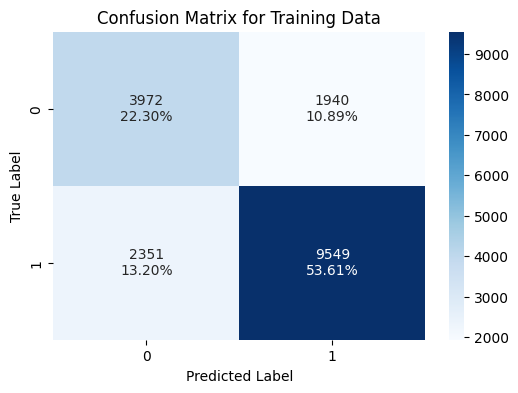

In [75]:
# Create confusion matrix
confusion_matrix_sklearn(rf_tuned, X_train, Y_train)

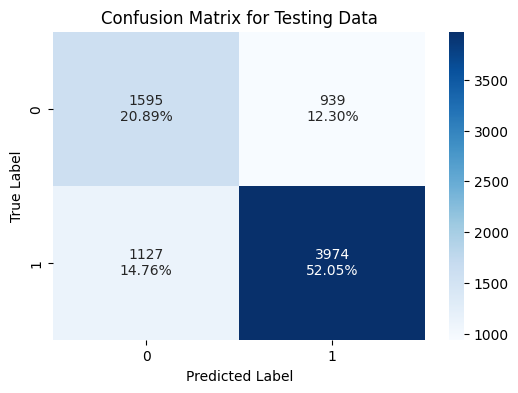

In [76]:
# Create confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, Y_test, data_type='Testing')

In [77]:
# Check performance of model
rf_tuned_perf = model_performance_classification_sklearn(rf_tuned, X_train,
                                                         Y_train, X_test,
                                                         Y_test)
rf_tuned_perf

,Accuracy,Recall,Precision,F1
Training,0.759,0.802,0.831,0.817
Testing,0.729,0.779,0.809,0.794


Observations:
* The tuned random forest outperforms the tuned decision tree across all metrics. For instance, in the test dataset, the random forest achieves an F1-score of 79.6% compared to 78.2% for decision tree.
* The random forest model suffers from slight overfitting as seen in the accuracy drop from 76.0% (training) to 73.1% (test).

## AdaBoost Classifier


### Model Building

In [78]:
# Build the model
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, Y_train)

AdaBoostClassifier(random_state=1)

#### Model Evaluation

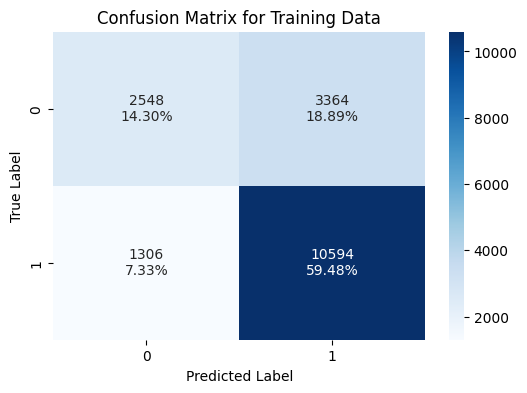

In [79]:
# Create confusion matrix
confusion_matrix_sklearn(abc, X_train, Y_train)

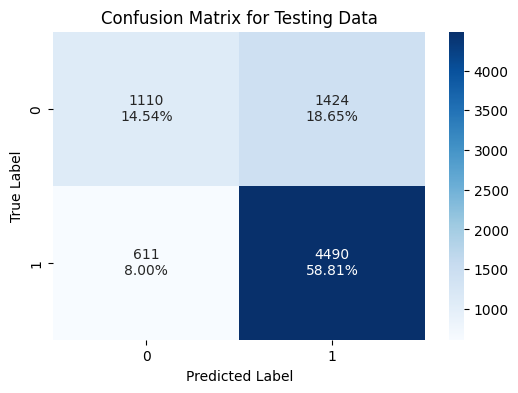

In [80]:
# Create confusion matrix
confusion_matrix_sklearn(abc, X_test, Y_test, data_type='Testing')

In [81]:
# Check performance of model
abc_perf = model_performance_classification_sklearn(abc, X_train, Y_train,
                                                    X_test, Y_test)
abc_perf

,Accuracy,Recall,Precision,F1
Training,0.738,0.890,0.759,0.819
Testing,0.733,0.880,0.759,0.815


Observations:
* The untuned model exhibits strong generalization, with F1 scores of 0.819 in training and 0.815 in testing.
* The AdaBoost model already outperforms the random forest model, and does not exhibit overfitting.

### Hyperparameter Tuning

In [82]:
# Build model with balanced class weights to handle imbalance
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of potential parameters
parameters = {
    'n_estimators' : np.arange(50, 110, 10),
    'learning_rate': [0.05, 0.1, 0.2],
    'estimator': [ DecisionTreeClassifier(max_depth=2, random_state=1),
                   DecisionTreeClassifier(max_depth=3, random_state=1)]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
abc_tuned.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.05, n_estimators=70, random_state=1)

#### Model Evaluation

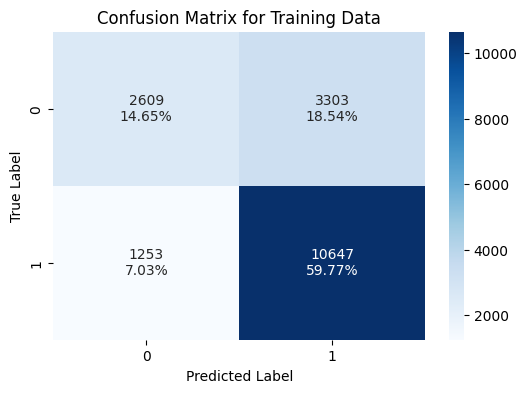

In [83]:
# Create confusion matrix
confusion_matrix_sklearn(abc_tuned, X_train, Y_train)

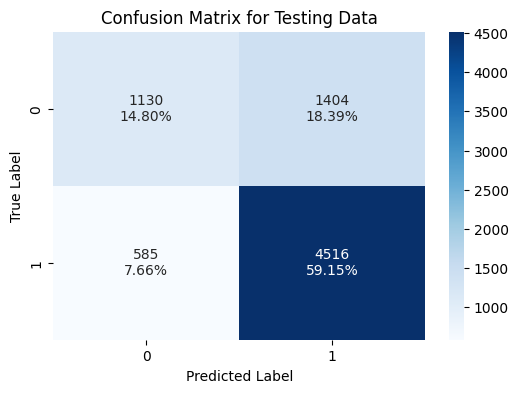

In [84]:
# Create confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, Y_test, data_type='Testing')

In [85]:
# Check performance of model
abc_tuned_perf = model_performance_classification_sklearn(abc_tuned, X_train,
                                                          Y_train, X_test,
                                                          Y_test)
abc_tuned_perf

,Accuracy,Recall,Precision,F1
Training,0.744,0.895,0.763,0.824
Testing,0.739,0.885,0.763,0.820


Observations:
* The model continues to have strong generalization capabilities and even exhibits a marginal increase in performance across all metrics compared to the untuned version.
* The model also has high recall and good precision in both training and testing datasets.

## Gradient Boosting Classifier


### Model Building

In [86]:
# Build the model
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

#### Model Evaluation

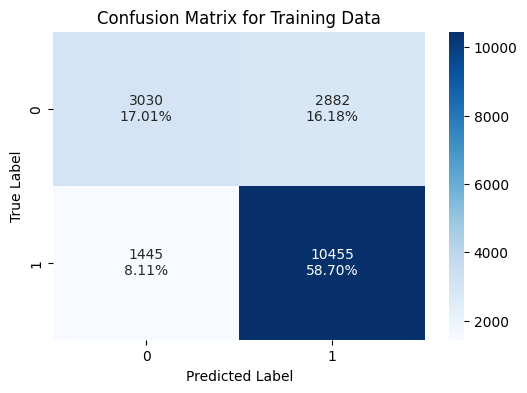

In [87]:
# Create confusion matrix
confusion_matrix_sklearn(gbc, X_train, Y_train)

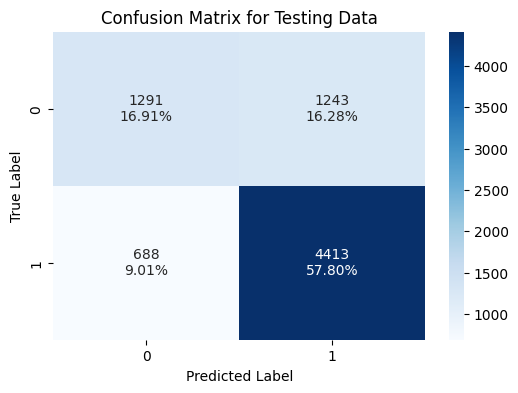

In [88]:
# Create confusion matrix
confusion_matrix_sklearn(gbc, X_test, Y_test, data_type='Testing')

In [89]:
# Check performance of model
gbc_perf = model_performance_classification_sklearn(gbc, X_train, Y_train,
                                                    X_test, Y_test)
gbc_perf

,Accuracy,Recall,Precision,F1
Training,0.757,0.879,0.784,0.829
Testing,0.747,0.865,0.780,0.820


Observations:
* The model shows a strong ability to generalize, evidenced by the closely aligned F1 scores between training (0.829) and testing (0.820), and consistent accuracy, recall and precision metrics.

### Hyperparameter Tuning

In [90]:
# Build model with balanced class weights to handle imbalance
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                       random_state=1)

# Grid of potential parameters
parameters = {
    'subsample':[0.7, 0.8, 0.9],
    'max_features': [0.5, 0.7, 1],
    'n_estimators' : [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
gbc_tuned.fit(X_train, Y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=150, random_state=1,
                           subsample=0.7)

#### Model Evaluation

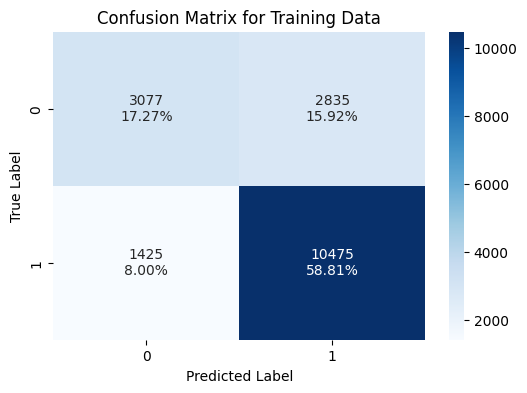

In [91]:
# Create confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_train, Y_train)

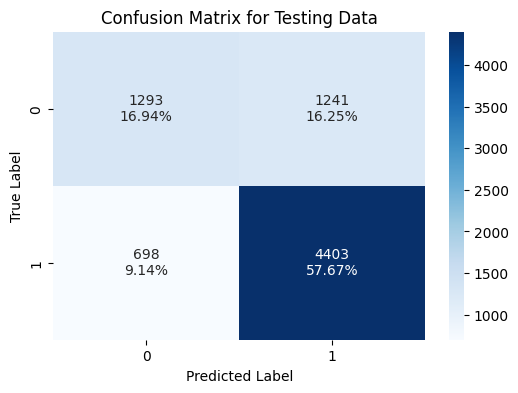

In [92]:
# Create confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, Y_test, data_type='Testing')

In [93]:
# Check performance of model
gbc_tuned_perf = model_performance_classification_sklearn(gbc_tuned, X_train,
                                                          Y_train, X_test,
                                                          Y_test)
gbc_tuned_perf

,Accuracy,Recall,Precision,F1
Training,0.761,0.880,0.787,0.831
Testing,0.746,0.863,0.780,0.820


Observations:
* The metrics show that both the untuned and tuned gradient boosting models perform almost identically on the test dataset.

## XGBoost Classifier


### Model Building

In [94]:
# Build the model
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Model Evaluation

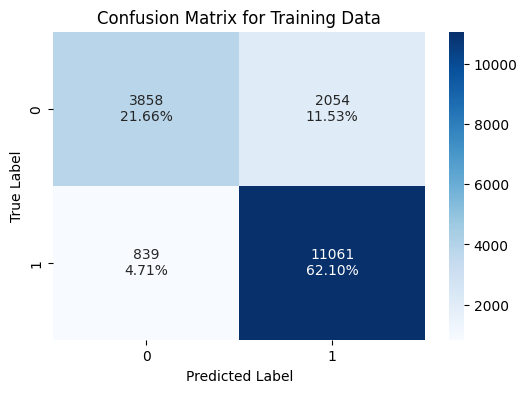

In [95]:
# Create confusion matrix
confusion_matrix_sklearn(xgb, X_train, Y_train)

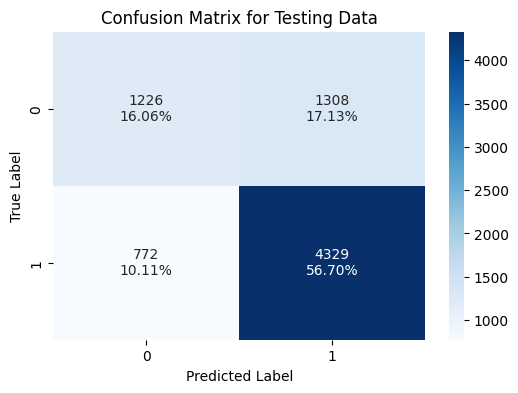

In [96]:
# Create confusion matrix
confusion_matrix_sklearn(xgb, X_test, Y_test, data_type='Testing')

In [97]:
# Check performance of model
xgb_perf = model_performance_classification_sklearn(xgb, X_train, Y_train,
                                                    X_test, Y_test)
xgb_perf

,Accuracy,Recall,Precision,F1
Training,0.838,0.929,0.843,0.884
Testing,0.728,0.849,0.768,0.806


Observations:
* The difference in performance metrics between training and testing indicates a notable level of overfitting in the untuned XGBoost model.

### Hyperparameter Tuning

In [98]:
# Build model with balanced class weights to handle imbalance
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')


# Grid of parameters to choose from
parameters = {
    'subsample': [0.8, 1.0],
    'scale_pos_weight': [1, 2],
    'gamma': [3, 5],
    'colsample_bytree': [0.8, 1.0],
    'colsample_bylevel': [0.8, 1.0],
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.2],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
xgb_tuned.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Model Evaluation

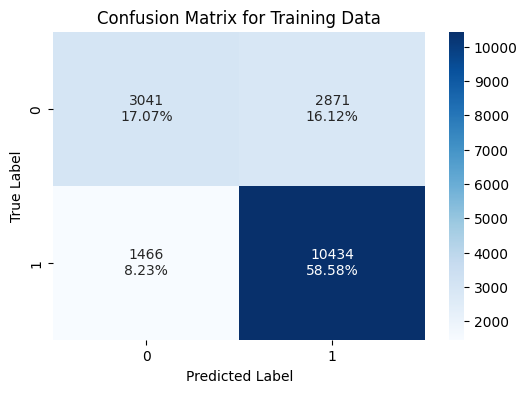

In [99]:
# Create confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_train, Y_train)

**Performance on Testing Set**

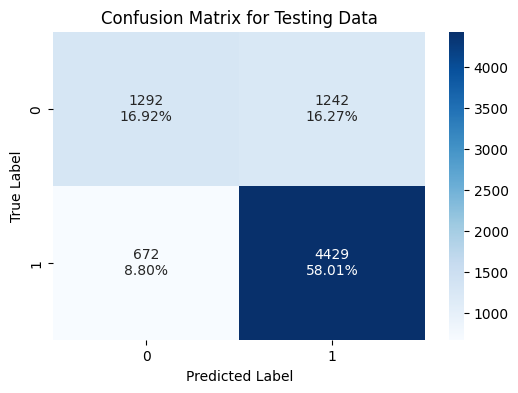

In [100]:
# Create confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, Y_test, data_type='Testing')

In [101]:
# Check performance of model
xgb_tuned_perf = model_performance_classification_sklearn(xgb_tuned, X_train,
                                                          Y_train, X_test,
                                                          Y_test)
xgb_tuned_perf

,Accuracy,Recall,Precision,F1
Training,0.757,0.877,0.784,0.828
Testing,0.749,0.868,0.781,0.822


Observations:
* The hyperparameter tuning addressed the model's prior overfitting and improved performance.
* Both XGBoost and gradient boosting models exhibit remarkably similar performance metrics on the test data. XGBoost has a slightly higher F1 score (0.822) compared to Gradient Boosting (0.820), but the difference is marginal.



## Stacking Classifier


### Model Building

In [102]:
# Build the model
estimators = [
    ('Random Forest', rf_tuned),
    ('Decision Tree Tuned', dtree_tuned),
    ('AdaBoost', abc_tuned),
    ('Gradient Boosting', gbc_tuned)
]

final_estimator = xgb_tuned

stacking = StackingClassifier(estimators=estimators,
                              final_estimator=final_estimator)
stacking.fit(X_train, Y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=9,
                                                       max_features=0.7,
                                                       max_samples=0.3,
                                                       n_estimators=190,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Decision Tree Tuned',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=4,
                                                       max_leaf_nodes=6,
                                                       min_impurity_decrease=0.0001,
                                                       min_samples_split=0.001,
                                                       random_state...
                                                 feature_types=None, gamma=5,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

#### Model Evaluation

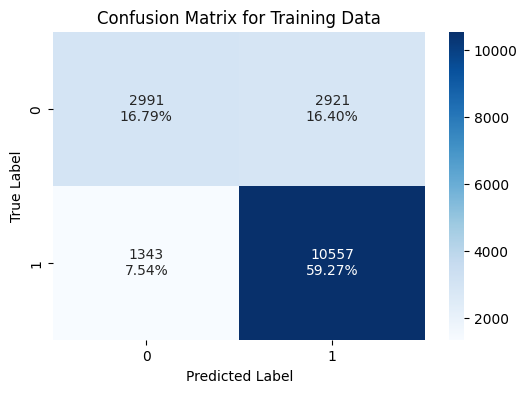

In [103]:
# Create confusion matrix
confusion_matrix_sklearn(stacking, X_train, Y_train)

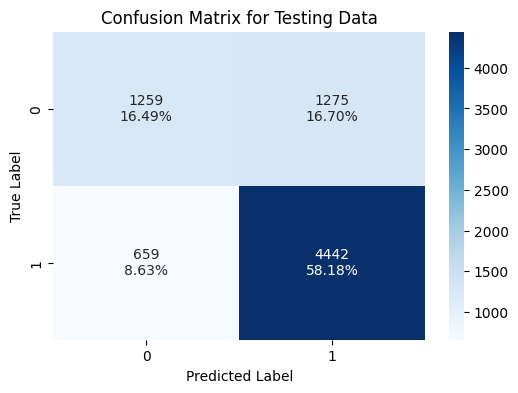

In [104]:
# Create confusion matrix
confusion_matrix_sklearn(stacking, X_test, Y_test, data_type='Testing')

In [105]:
# Check performance of model
stacking_perf = model_performance_classification_sklearn(stacking, X_train,
                                                         Y_train, X_test,
                                                         Y_test)
stacking_perf

,Accuracy,Recall,Precision,F1
Training,0.761,0.887,0.783,0.832
Testing,0.747,0.871,0.777,0.821


Observations:
* Compared to the XGBoost model, the stacking model has a marginally lower accuracy (0.747 vs. 0.749) and precision (0.777 vs. 0.781), but slightly higher recall (0.871 vs. 0.868). Notably, the F1 scores are almost identical.

## Model Performance and Selection

### Model Performance Comparison

In [106]:
models_train_perf = pd.concat(
    [
        dtree_perf.loc['Training'].T,
        dtree_tuned_perf.loc['Training'].T,
        bagging_perf.loc['Training'].T,
        bagging_tuned_perf.loc['Training'].T,
        rf_perf.loc['Training'].T,
        rf_tuned_perf.loc['Training'].T,
        abc_perf.loc['Training'].T,
        abc_tuned_perf.loc['Training'].T,
        gbc_perf.loc['Training'].T,
        gbc_tuned_perf.loc['Training'].T,
        xgb_perf.loc['Training'].T,
        xgb_tuned_perf.loc['Training'].T,
        stacking_perf.loc['Training'].T
    ],
    axis=1
)

models_train_perf.columns = [
    'Decision Tree',
    'Tuned Decision Tree',
    'Bagging Classifier',
    'Tuned Bagging Classifier',
    'Random Forest',
    'Tuned Random Forest',
    'AdaBoost Classifier',
    'Tuned AdaBoost Classifier',
    'Gradient Boosting Classifier',
    'Tuned Gradient Boosting Classifier',
    'XGBoost Classifier',
    'Tuned XGBoost Classifier',
    'Stacking Classifier'
]

print('Training performance comparison:')
models_train_perf

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,AdaBoost Classifier,Tuned AdaBoost Classifier,Gradient Boosting Classifier,Tuned Gradient Boosting Classifier,XGBoost Classifier,Tuned XGBoost Classifier,Stacking Classifier
Accuracy,1.000,0.710,0.986,0.945,1.000,0.759,0.738,0.744,0.757,0.761,0.838,0.757,0.761
Recall,1.000,0.792,0.988,0.997,1.000,0.802,0.890,0.895,0.879,0.880,0.929,0.877,0.887
Precision,1.000,0.779,0.991,0.927,1.000,0.831,0.759,0.763,0.784,0.787,0.843,0.784,0.783
F1,1.000,0.785,0.989,0.960,1.000,0.817,0.819,0.824,0.829,0.831,0.884,0.828,0.832


Observations:
* As previously discussed, the perfect or near perfect performance for baseline decision tree, bagging and random forest models are strong indicators of overfitting.
* Tuned models generally have lower scores, but provide a more realistic assessment of the model's performance compared to their non-tuned, overfitted counterparts.

In [107]:
models_test_perf = pd.concat(
    [
        dtree_perf.loc['Testing'].T,
        dtree_tuned_perf.loc['Testing'].T,
        bagging_perf.loc['Testing'].T,
        bagging_tuned_perf.loc['Testing'].T,
        rf_perf.loc['Testing'].T,
        rf_tuned_perf.loc['Testing'].T,
        abc_perf.loc['Testing'].T,
        abc_tuned_perf.loc['Testing'].T,
        gbc_perf.loc['Testing'].T,
        gbc_tuned_perf.loc['Testing'].T,
        xgb_perf.loc['Testing'].T,
        xgb_tuned_perf.loc['Testing'].T,
        stacking_perf.loc['Testing'].T
    ],
    axis=1
)

models_test_perf.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "AdaBoost Classifier",
    "Tuned AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "Tuned Gradient Boosting Classifier",
    "XGBoost Classifier",
    "Tuned XGBoost Classifier",
    "Stacking Classifier",
]

print('Testing performance comparison:')
models_test_perf

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,AdaBoost Classifier,Tuned AdaBoost Classifier,Gradient Boosting Classifier,Tuned Gradient Boosting Classifier,XGBoost Classifier,Tuned XGBoost Classifier,Stacking Classifier
Accuracy,0.657,0.708,0.701,0.726,0.718,0.729,0.733,0.739,0.747,0.746,0.728,0.749,0.747
Recall,0.743,0.781,0.778,0.898,0.837,0.779,0.880,0.885,0.865,0.863,0.849,0.868,0.871
Precision,0.743,0.782,0.776,0.744,0.764,0.809,0.759,0.763,0.780,0.780,0.768,0.781,0.777
F1,0.743,0.782,0.777,0.814,0.799,0.794,0.815,0.820,0.820,0.820,0.806,0.822,0.821


Observations:
* Effective tuning is able to reduce or eliminate overfitting, increasing the generaliation of tuned models to unseen data.
* Models like the tuned bagging classifier, AdaBoost classifier (both regular and tuned), and stacking classifier demonstrate high recall. This means they are effective in identifying qualified visa applicants, but may also have a higher risk of approving unqualified candidates.
* Models with the highest F1 scores, such as the tuned XGBoost classifier and stacking classifier, are effective at minimizing both types of errors (incorrect approvals and denials).
* High precision in models like the tuned random forest, tuned decision tree, and tuned XGBoost classifier (all above 0.78) means they are good at minimizing false positives.
* The tuned XGBoost, tuned gradient boosting, tuned AdaBoost, and stacking classifiers exhibit the highest accuracy scores (around 0.74). However, given the imbalance in the dataset, it's important to also consider other performance metrics.

### Final Model Selection

In [108]:
# Only view tuned and stacking models
tuned_models_test_perf = models_test_perf.filter(regex='Tuned|Stack', axis=1)
tuned_models_test_perf.T.sort_values('F1', ascending=False)

,Accuracy,Recall,Precision,F1
Tuned XGBoost Classifier,0.749,0.868,0.781,0.822
Stacking Classifier,0.747,0.871,0.777,0.821
Tuned Gradient Boosting Classifier,0.746,0.863,0.780,0.820
Tuned AdaBoost Classifier,0.739,0.885,0.763,0.820
Tuned Bagging Classifier,0.726,0.898,0.744,0.814
Tuned Random Forest,0.729,0.779,0.809,0.794
Tuned Decision Tree,0.708,0.781,0.782,0.782


Observations:
* The tuned XGBoost classifier and the stacking classifier appear to be the top-performing models based on these metrics, with high accuracy, recall, precision, and F1 scores.
* The tuned XGBoost model boasts the highest F1 score, but it is only a marginal improvement over the stacking classifier.

In [109]:
print('Testing performance for Tuned XGBoost:\n')
xgb_tuned_perf.loc['Testing']

Testing performance for Tuned XGBoost:



Accuracy    0.749
Recall      0.868
Precision   0.781
F1          0.822
Name: Testing, dtype: float64

Based on the testing performance metrics and considering the business impact, the **tuned XGBoost classifier** appears to be the most suitable model for final selection.

* The recall (0.868) is high, meaning the model is good at identifying a large proportion of actual positive cases (i.e., correct visa approvals). This is crucial to ensure that qualified candidates are not erroneously denied visas.

* While not the highest, the precision (0.781) is still strong, suggesting that the model is good at minimizing the number of unqualified applicants being approved.

* The F1 score (0.822) is the highest among all models, indicating a balanced approach to minimizing both types of errors (incorrect approvals and denials).

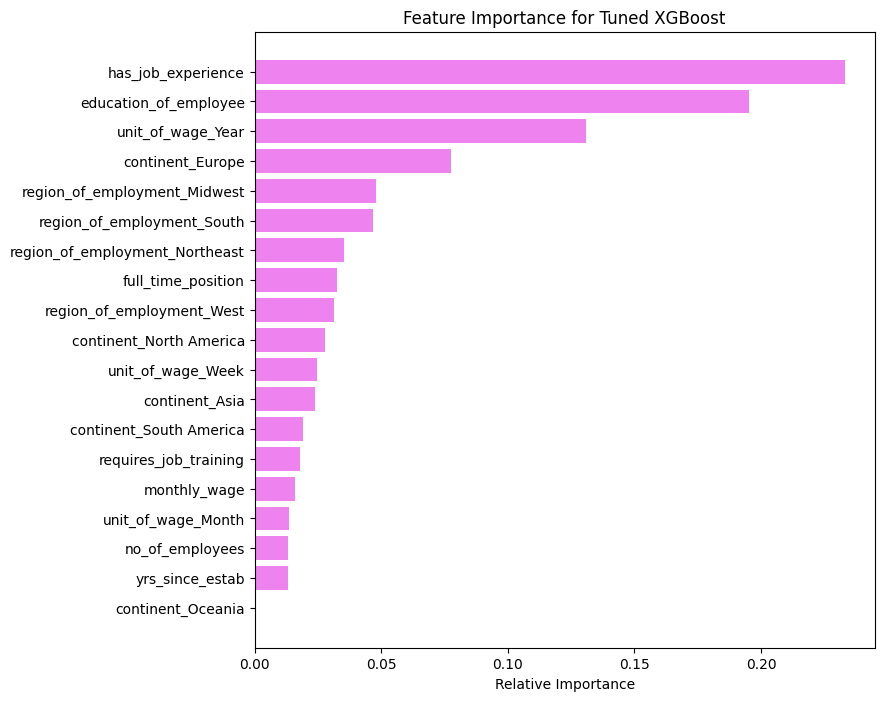

In [110]:
# Retrieve the feature importances from the model
importances = xgb_tuned.feature_importances_

# Get the indices of the features sorted by their importance
indices = np.argsort(importances)

# Plotting the feature importances
plt.figure(figsize=(8, 8))
plt.title('Feature Importance for Tuned XGBoost')

# Create a horizontal bar chart of feature importances
plt.barh(range(len(indices)), importances[indices], color='violet',
         align='center')

# Label the y-axis with the names of the features, ordered by importance
feature_names = X_train.columns
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

# Add labels
plt.xlabel('Relative Importance')
plt.show()

Observations:
* The feature importance findings from the XGBoost model align with the observations made during the exploratory data analysis.
* The `has_job_experience` attribute holds the highest significance, followed by the `education_of_employee` attribute. During the EDA it was observed that applicants with university degrees had a significantly higher likelihood of receiving a visa approval.
* The `unit_of_wage_Year` and various `region_of_employment` features (Midwest, South, Northeast) also carry considerable weight, emphasizing the substantial impact of a salary pay structure and the geographic location of the job within the United States on visa approval chances.
* This chart also indicates that the `continent_Europe` feature has a significant impact on the model's predictions. It may be crucial to evaluate whether this reflects an unintended bias or a legitimate pattern based on the historical data.

## Actionable Insights and Recommendations

**Qualities of Approved Applicants**

Based on the results of the exploratory data analysis and the predictive model's outcomes, the following are top predictors of approved visa status:

 * **Job Experience**: Applicants with verifiable job experience stand out in the predictive model's analysis, indicating a higher likelihood of approval.
 * **Educational Background**: Higher education levels are consistently associated with successful visa applications, reflecting the value placed on formal qualifications.
 * **Annual Wage Consideration**: Applicants with an annual compensation structure, as opposed to hourly, weekly or monthly, are more often approved, suggesting a preference for stable, long-term employment arrangements.
 * **Regional Employment**: The U.S. region of proposed employment plays a significant role, with the regions Midwest, South, and Northeast correlating with higher approval rates, potentially due to regional economic needs.
 * **Continent of Origin**: The continent of origin, particularly Europe, has emerged as a notable factor, highlighting potential trends or biases in the approval process that require further exploration to ensure fairness.

<br>

**Business Recommendations**

1. **Implement the Tuned XGBoost Classifier**

    Implement the tuned XGBoost classifier as the primary model for the visa approval process as it has demonstrated consistent high performance across all key metrics, with a notable F1 score of 0.822 in particular. The F1 score is critical as it provides a balanced measure of the model's accuracy in classifying both positive and negative visa outcomes effectively.
    
    However, given that model performance can change over time due to shifts in applicant demographics or other factors, regular monitoring and updates will be required ensure that the model remains effective.

1. **Prioritize Applications with High Approval Probability**
    
    Systematically prioritize applicants with higher levels of education and significant job experience during the review process, as these factors have been shown to increase the likelihood of visa certification.

2. **Streamline Denial Process for Low-Probability Applications**

    Establish a fast-track denial process for applications predicted to have a high likelihood of rejection, allowing resources to focus on more promising applicants. Rejected applicants, however, should have a clear and accessible appeals.

3. **Enhance Model with Additional Data**

    Include additional variables such as industry of employment and years of transferable or applicable experience into the classification model to improve its predictive capabilities.

4. **Assess Socioeconomic Impact of Employers**

    Include an assessment of the potential socioeconomic benefits brought by the employer hiring foreign employees, prioritizing applications that offer significant contributions to the U.S. economy.